# BT4211 Final Project: Credit Card Anaylsis

- CUSTID: Identification of Credit Cardholder (Categorical)

- BALANCE (Available Credit): Difference between credit limit and payments
> After making a payment, you will have more available credit/balance to borrow again.

- BALANCE_FREQUENCY: How frequently the Balance is updated.
> How often is the Balance being increased or decreased. Ranges between 0 and 1 (1 = frequently updated, 0 = not frequently -updated)

- PURCHASES: Amount of purchases made from the account (ONEOFF + INSTALLMENTS)
> Total amount of money spent to purchase stuff with that Account.

- ONEOFF_PURCHASES: Records the Maximum purchase amount did in one-go (one-time payment), doesnt cumulate!
> When a customer makes a single purchase of a product/service via one-time payment

- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
> Total amount of money spent for purchases using Installments

- CASH_ADVANCE: Total Cash in Advance given by the user
> A type of transaction in credit cards where the cardholder deposits money into their credit card amount in advance of making purchases. This means that the cardholder is paying for their purchases in advance of receiving them.

- PURCHASES_FREQUENCY: How frequently the Purchases are being made.
> How often is the purchase amount being increased. Ranges between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go.
> How often is the purchases being paid via one-time payment. Ranges between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done.
> How often is the installment purchase amount being increased. Ranges between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
> How often is the Cash Advance being paid off by the customer

- CASH_ADVANCE_TRX: Number of Transactions made with “Cash Advance”.
> Total count of Cash Advances (Withdraw Extra Cash) that were made using the credit card line. Out of the total number of times a customer used the card, how many times were used to get cash_advance.

- PURCHASES_TRX: Number of Purchase transactions made.
> Total count of Purchases made.

- CREDIT LIMIT: Limit of Credit Card for user
> Maximum amount that a person can spend on his/her credit card

- PAYMENTS: Amount of Payment done by the user
> Amount of money that the customer pays to their credit card company to repay the amount of money that have borrowed through purchases, cash advances, or any fees/interest charges.

- MINIMUM_PAYMENTS: Minimum amount of payments made by the user
> Lowest amount of money that a cardholder must pay to their credit card company each billing cycle.

- PRC_FULL_PAYMENT: Percent of full payment paid by the user
> Percentage of the Amount of Money owed to the credit card company paid by the user.

- TENURE: Tenure of credit card service for user

## 1. Import Libraries

In [303]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import plotly.graph_objects as go
import statsmodels.api as sm
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [405]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, RobustScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.manifold import TSNE
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, FactorAnalyzer, calculate_kmo
from sklearn.ensemble import IsolationForest
from kneed import KneeLocator
import pingouin as pg

In [305]:
#SKlearn & other ML Packages
import shap
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score, log_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [306]:
import warnings
warnings.filterwarnings(action="ignore")
from mpl_toolkits.mplot3d import Axes3D

## 2. Data

In [307]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [308]:
df.shape

(8950, 18)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [310]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 2.1 Data Cleaning & Handling Missing Values

In [311]:
#Check for missing/NULL values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

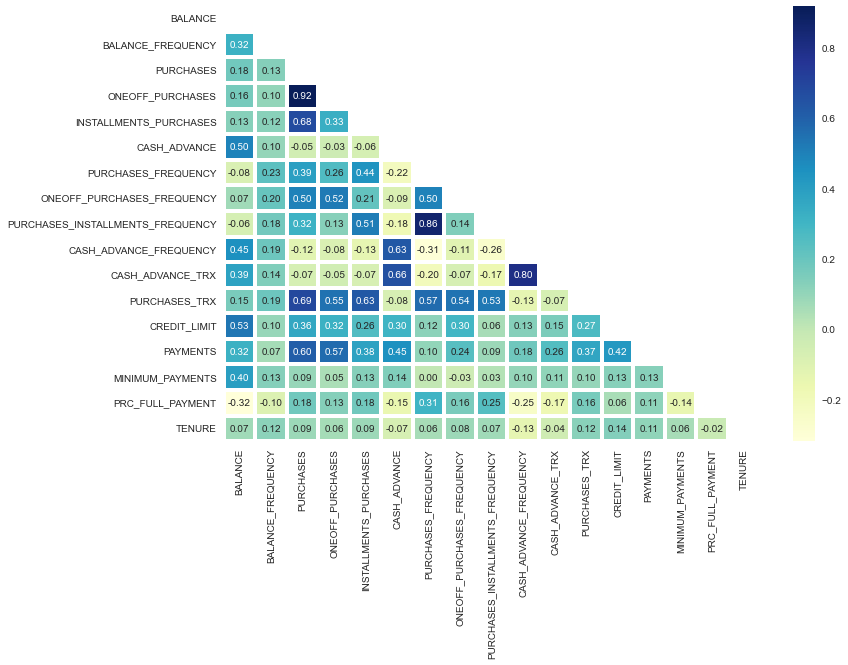

In [312]:
corr = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap='YlGnBu', linewidths=3, fmt=".2f", mask = np.triu(corr))
plt.show()

#### 2.1.1 Linear Regression Imputation for Missing Data
From the missing data list, the feature 'MINIMUM_PAYMENTS' have relatively high number of missing values. Hence it will not be ideal to drop those entries. In this case, the Linear Regression Imputation will be applied to fill those missing data so as to not skew our features distribution or introduce any bias. The methodology would be to use a linear regression model to patch the missing data using the correlated explanatory variables. After forming the correlation map, Explanatory variables were chosen for each response variable based on their linear correlation. In this case, the top 2 variable with the highest correlation will be chosen as an explanatory variable since most of the other features have relatively lower correlation.

In [313]:
#May Take awhile to run the patching for NULL values
missing_features = ['MINIMUM_PAYMENTS']
lr_mapping = {}
for i in missing_features:
    exp_var = corr.unstack()[i].sort_values(kind = 'quicksort', ascending = False)[1:3].index
    lr_mapping[i] = exp_var

for key, val in lr_mapping.items():
    df_temp = df.copy()
    df_temp = df.dropna(subset = key, axis = 0)
    X = df_temp[val]
    y = df_temp[key]

    imp_model = LinearRegression()
    imp_model.fit(X, y)
    
    if key == "MINIMUM_PAYMENTS":
        df.loc[df[key].isna(), key] = df.apply(lambda x: round(imp_model.predict([x[val]])[0], 1), axis=1)

#### 2.1.2 Handling the Remaining Missing Data

In [314]:
#Since all CUST_ID are truly unique, we can drop the column on cust_id
df = df.drop(['CUST_ID'], axis = 1)

#Patching the null values
df = df.dropna(subset = ['CREDIT_LIMIT'])

In [315]:
#check for dupes
df.duplicated().sum()

0

In [316]:
#Monthly Average Purchase over the period the customer has been using the card
df['avg_monthly_purchase'] = df['PURCHASES']/df['TENURE']
                                  
#Monthly Average Cash Advance over the period the customer has been using the card
df['avg_monthly_cash'] = df['CASH_ADVANCE']/df['TENURE']

#Monthly Average Payments over the period the customer has been using the card
df['avg_monthly_installments'] = df['INSTALLMENTS_PURCHASES']/df['TENURE']

#Utilization rate of Credit Card
df['utilisation_ratio'] = (df['CREDIT_LIMIT'] - df['BALANCE'])/df['CREDIT_LIMIT']

#Based on the type of purchases, we can classify or categorise it according to type of purchase they made.
df['type_of_purchase'] = np.where((df['INSTALLMENTS_PURCHASES'] > 0) & (df['ONEOFF_PURCHASES'] == 0), 'Installment',
                        np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] > 0), 'One_off',
                        np.where((df['INSTALLMENTS_PURCHASES'] > 0) & (df['ONEOFF_PURCHASES'] > 0), 'Both', 'Cash')))

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [318]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'type_of_purchase'],
      dtype='object')

### 2.2 Quantile Statistics

In [319]:
# Quantile Statistics
num_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio']
quantile = df[num_features].describe().loc[["min", "25%", "50%", "75%", "max"]].transpose()
quantile.columns = ["min", "Q1", "Q2", "Q3", "max"]
quantile["range"] = quantile["max"] - quantile["min"]
quantile["IQR"] = quantile["Q3"] - quantile["Q1"]
quantile

,min,Q1,Q2,Q3,max,range,IQR
BALANCE,0.000000,128.365782,873.680279,2054.372848,19043.138560,19043.138560,1926.007066
BALANCE_FREQUENCY,0.000000,0.888889,1.000000,1.000000,1.000000,1.000000,0.111111
PURCHASES,0.000000,39.800000,361.490000,1110.170000,49039.570000,49039.570000,1070.370000
ONEOFF_PURCHASES,0.000000,0.000000,38.000000,577.830000,40761.250000,40761.250000,577.830000
INSTALLMENTS_PURCHASES,0.000000,0.000000,89.000000,468.650000,22500.000000,22500.000000,468.650000
CASH_ADVANCE,0.000000,0.000000,0.000000,1113.868654,47137.211760,47137.211760,1113.868654
PURCHASES_FREQUENCY,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,0.833334
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,0.083333,0.300000,1.000000,1.000000,0.300000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,0.750000
CASH_ADVANCE_FREQUENCY,0.000000,0.000000,0.000000,0.222222,1.500000,1.500000,0.222222


### 2.3 Descriptive Statistics

In [320]:
#General Descriptive Statistics for Numerical Features
descriptive_stats = df[num_features].describe().loc[["mean", "std", "50%"]].transpose()
descriptive_stats.columns = ["mean", "std", "median"]
descriptive_stats["mode"] = df[num_features].mode().transpose()[0]
descriptive_stats["mad"] = [stats.median_abs_deviation(df[x]) for x in num_features]
descriptive_stats["kurtosis"] = [stats.kurtosis(df[x], fisher=False) for x in num_features]
descriptive_stats["excess kurtosis"] = [stats.kurtosis(df[x], fisher=True) for x in num_features]
descriptive_stats["skewness"] = [stats.skew(df[x]) for x in num_features]
descriptive_stats

,mean,std,median,mode,mad,kurtosis,excess kurtosis,skewness
BALANCE,1564.647593,2081.584016,873.680279,0.0,800.045248,10.669089,7.669089,2.392869
BALANCE_FREQUENCY,0.877350,0.236798,1.000000,1.0,0.000000,6.095206,3.095206,-2.023854
PURCHASES,1003.316936,2136.727848,361.490000,0.0,361.490000,114.317027,111.317027,8.142604
ONEOFF_PURCHASES,592.503572,1659.968851,38.000000,0.0,38.000000,167.079674,164.079674,10.042938
INSTALLMENTS_PURCHASES,411.113579,904.378205,89.000000,0.0,89.000000,99.512552,96.512552,7.297600
CASH_ADVANCE,978.959616,2097.264344,0.000000,0.0,0.000000,55.863880,52.863880,5.165457
PURCHASES_FREQUENCY,0.490405,0.401360,0.500000,1.0,0.416667,1.361634,-1.638366,0.059960
ONEOFF_PURCHASES_FREQUENCY,0.202480,0.298345,0.083333,0.0,0.083333,4.160000,1.160000,1.535196
PURCHASES_INSTALLMENTS_FREQUENCY,0.364478,0.397451,0.166667,0.0,0.166667,1.601313,-1.398687,0.508938
CASH_ADVANCE_FREQUENCY,0.135141,0.200132,0.000000,0.0,0.000000,6.331658,3.331658,1.828338


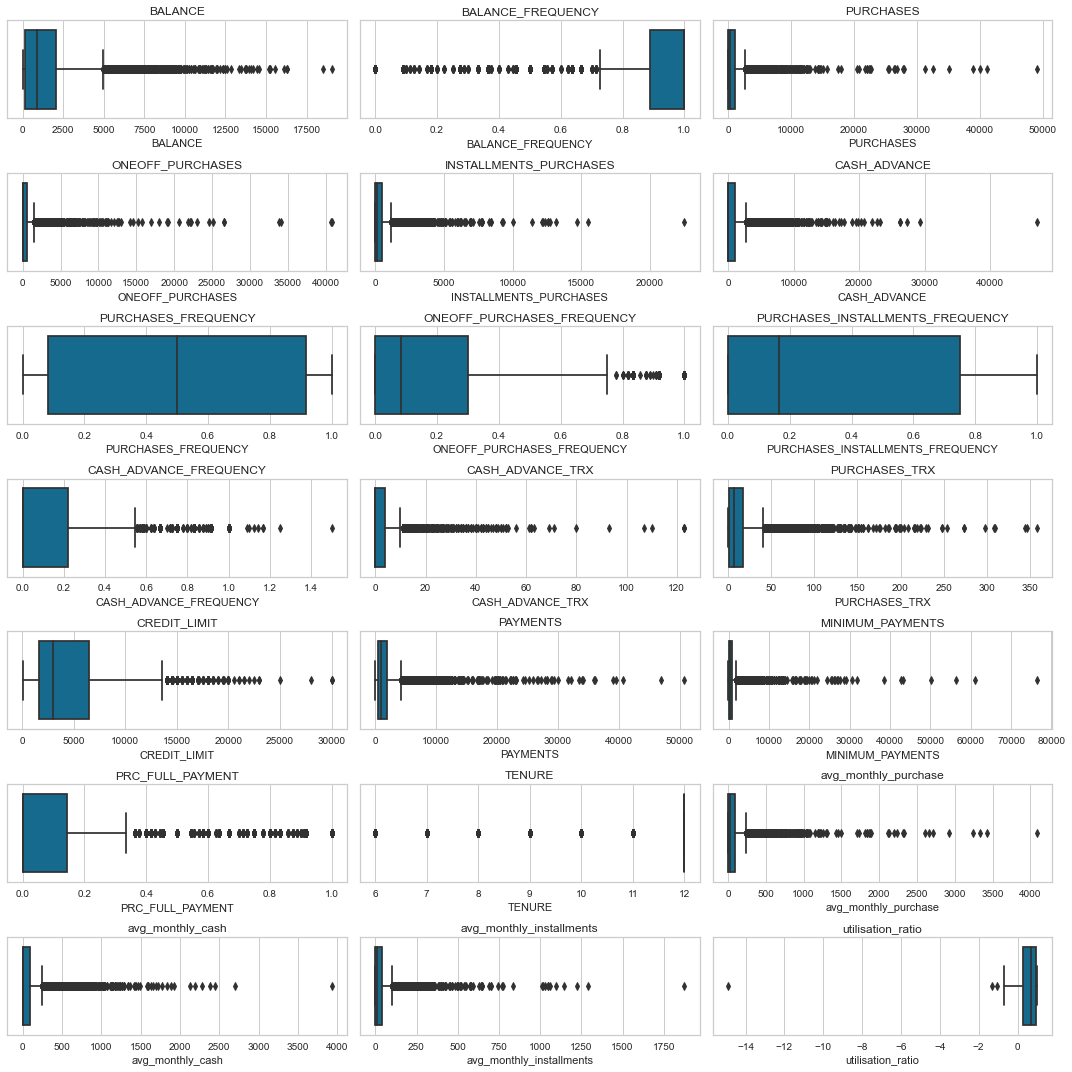

In [321]:
#As observed there is large amount of outliers and distribution isnt normal since they are highly skewed to either sides.
fig= plt.subplots(nrows = 7 , ncols = 3, figsize=(15,15))
for i in range(len(df[num_features].columns)):
    plt.subplot(7, 3, i+1)
    ax=  sns.boxplot(x = df[num_features][df[num_features].columns[i]])
    plt.title(df[num_features].columns[i])
    plt.tight_layout()

### 2.4 Handling Outliers (Isolation Forest)

From the quantile and descriptive statistics, it tells us that the distribution of the dataset set is extremely skewed (not normal) and there exists huge variances in the feature range. Hence, there exists alot of outliers as seen in the boxplot afterwards. To combat this, Isolation Forest is used as it is known to be computationally efficient and does not assume normal distribution. Additionally, it is able to detect outliers in a multi-dimensional level. 

Isolation Forest is based on the concept of using a Random Forest of decision trees to isolate outliers from the rest of the data. It works by randomly selecting a feature and a split value at each node of a decision tree. It continues to split the data until all of the points hvae been isolated into individual trees. This idea comes that outliers will require fewer splits to isolate since they are further away from the majority of the data points. This means that outliers will have shorter path length in the tree than normal data points which makes it easier to identify them. After identifying this outliers, the data points are dropped for easier segmentation of customers in the following portions.

In [322]:
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio']

clean_df = df[features].copy()
model = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(clean_df)

IsolationForest(contamination=0.1, n_estimators=150)

In [323]:
# Adding 'scores' and 'anomaly' colums to df
scores = model.decision_function(clean_df)
anomaly = model.predict(clean_df) #pred
clean_df['scores'] = scores
clean_df['anomaly'] = anomaly #pred

outliers = clean_df.loc[clean_df['anomaly'] == -1]
outliers_index = list(outliers.index)

anomaly = clean_df.loc[clean_df['anomaly'] == -1]
anomaly_index = list(anomaly.index)

print('Num of Outliers:', len(anomaly))

Num of Outliers: 895


In [324]:
if 8949 in outliers_index:
    outliers_index.remove(8949)

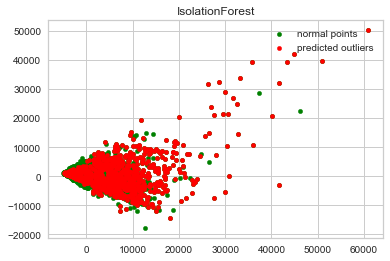

In [325]:
pca = PCA(n_components = 2, random_state = 0)
pca.fit(clean_df)
res = pd.DataFrame(pca.transform(clean_df))
Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green', s = 20,label = "normal points")
b1 = plt.scatter(res.iloc[outliers_index, 0], res.loc[outliers_index, 1], 
                 c = 'red',s = 20, edgecolor = "red", label = "predicted outliers")
plt.legend(loc = "upper right")
plt.show()

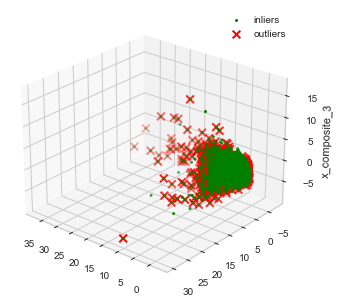

In [326]:
%matplotlib inline

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(clean_df)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outliers_index, 0],X_reduce[outliers_index,1], X_reduce[outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()

ax.view_init(azim = -230, elev = 25)
plt.show()

In [327]:
# dropping outliers
clean_df = clean_df.drop(anomaly_index, axis = 0).reset_index(drop=True)

## 3. Exploratory Data Analysis (EDA)

In [328]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'type_of_purchase'],
      dtype='object')

### 3.1 General Features Distribution & Correlations

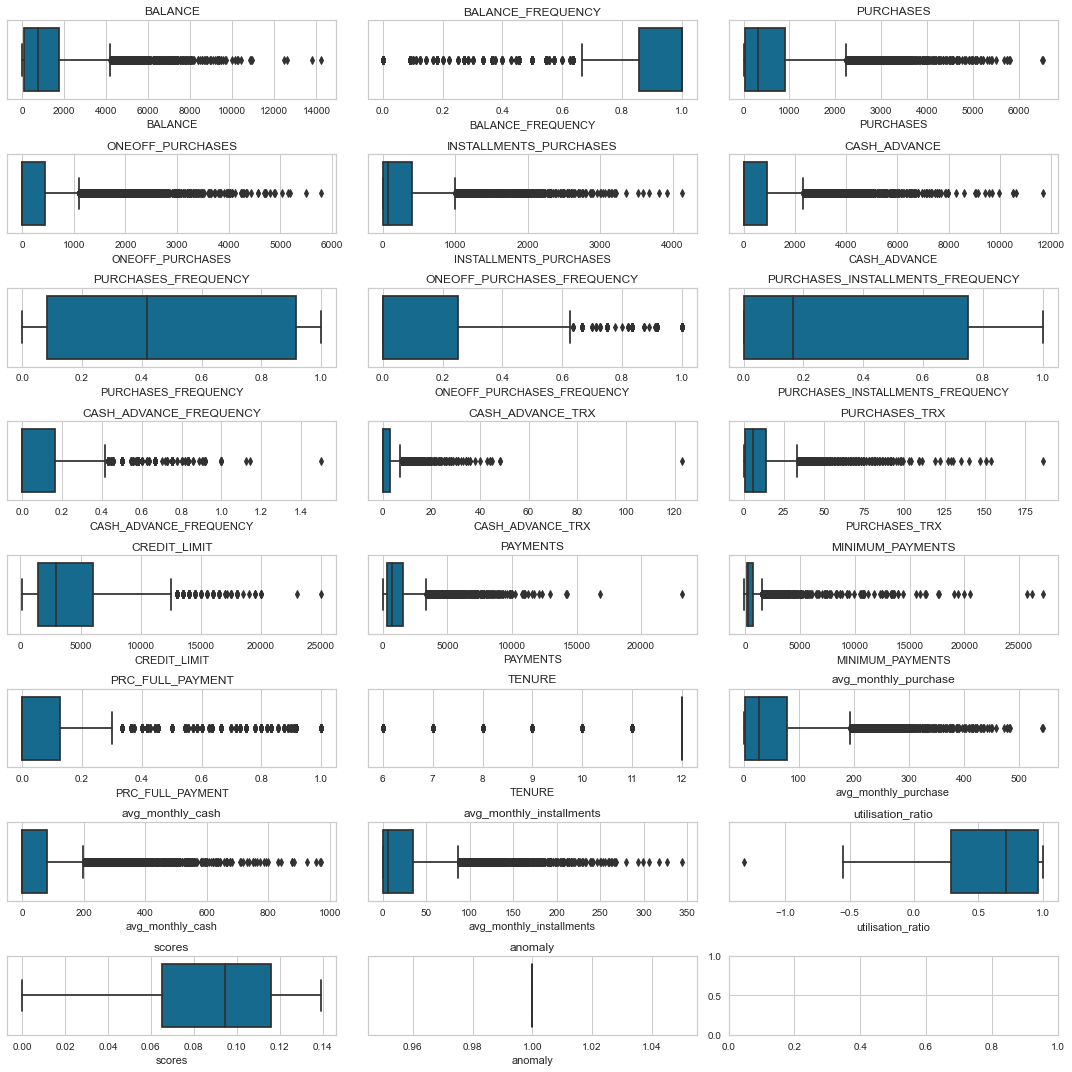

In [329]:
fig= plt.subplots(nrows = 8, ncols = 3, figsize=(15, 15))
for i in range (len(clean_df.columns)):
    plt.subplot(8, 3, i+1)
    ax =  sns.boxplot(x = clean_df[clean_df.columns[i]])
    plt.title(clean_df.columns[i])
    plt.tight_layout()

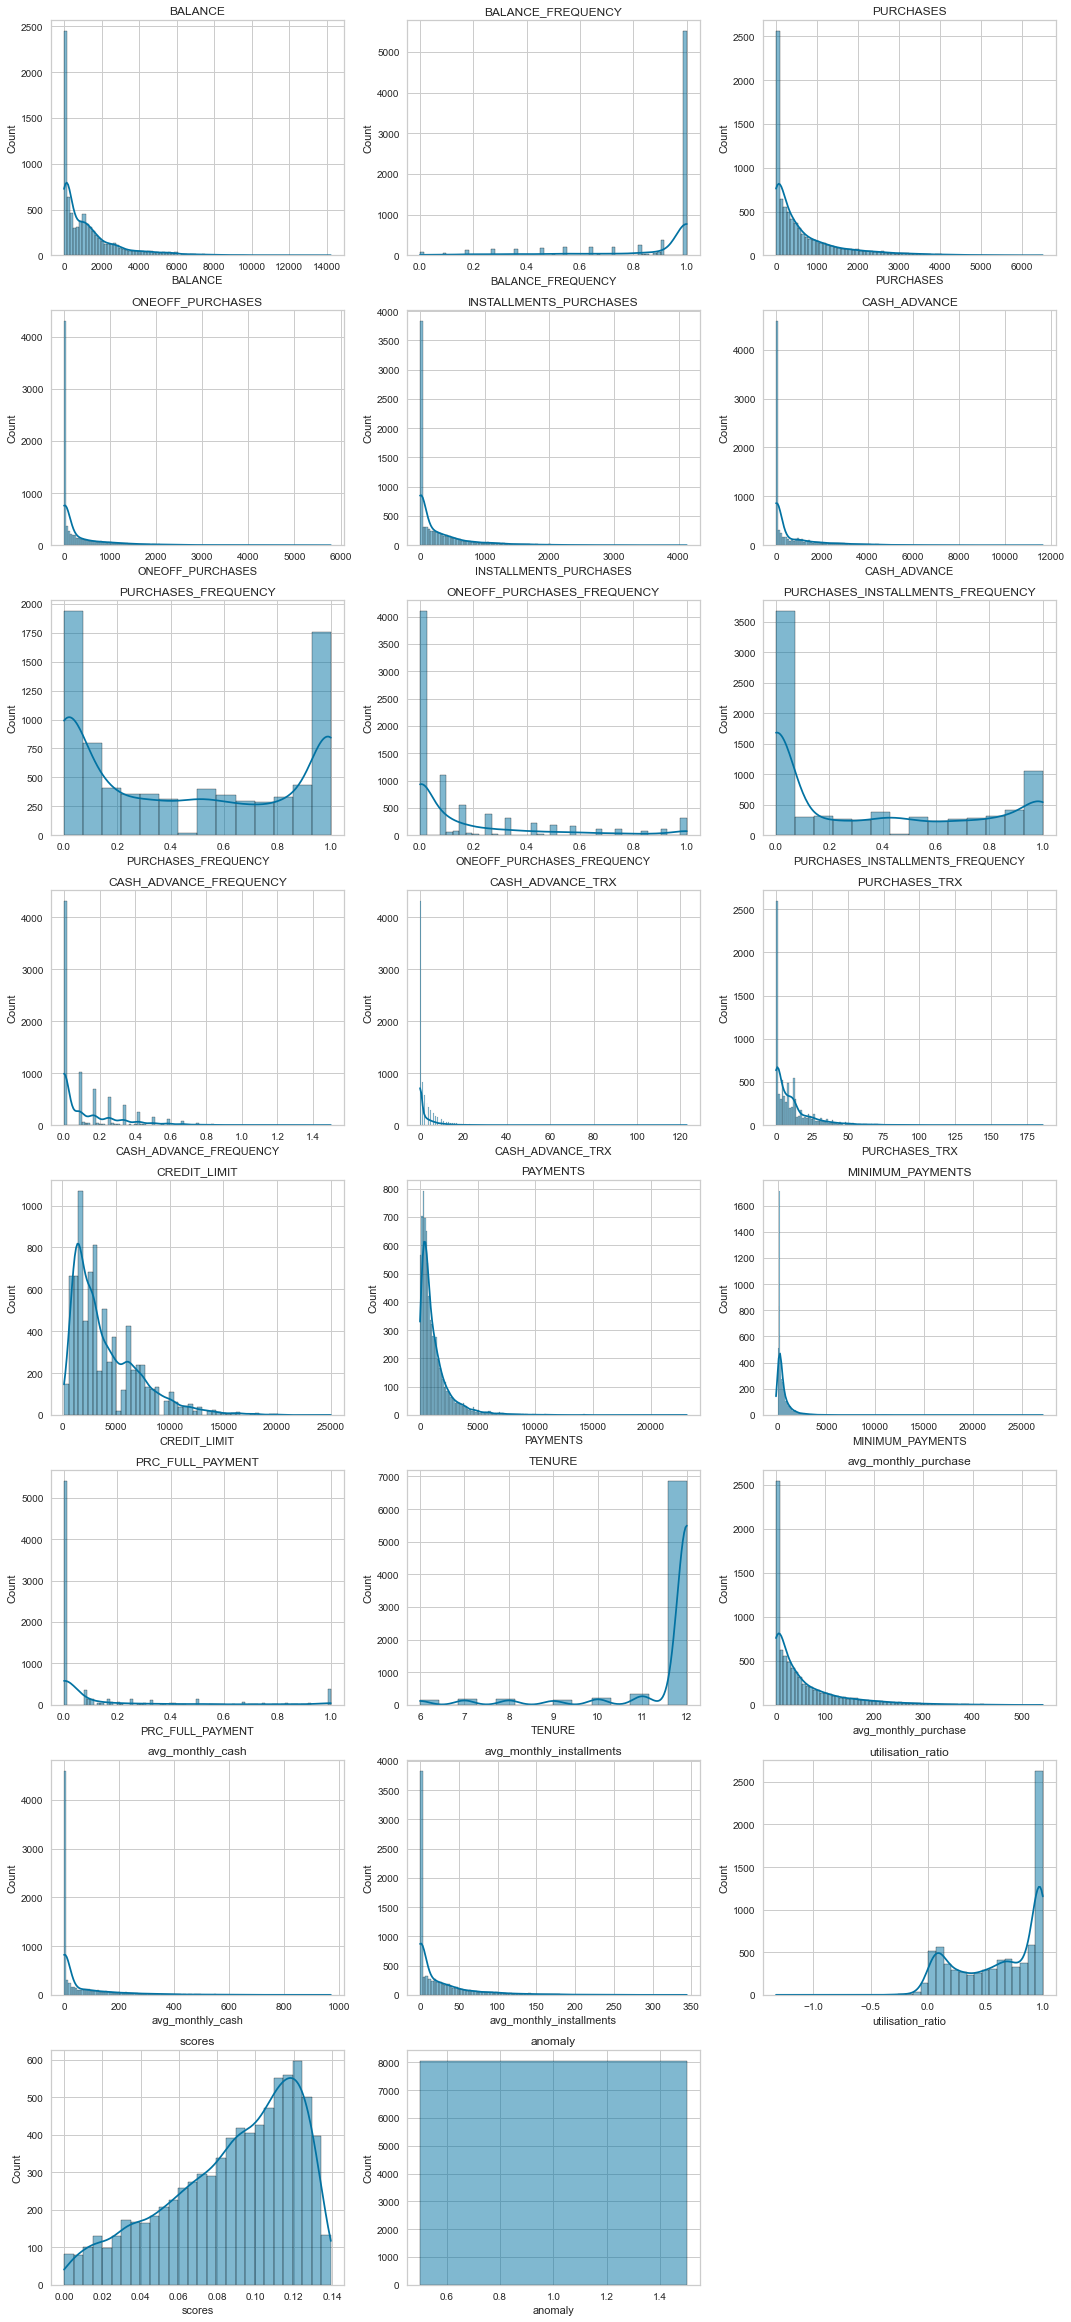

In [330]:
plt.figure(figsize = (15, 40))

for i in range(len(clean_df.columns)):
    plt.subplot(10, 3, i+1)
    sns.histplot(clean_df[clean_df.columns[i]] , kde = True)
    plt.title(clean_df.columns[i])
    
plt.tight_layout()

Observation:

 - Most credit card holders have low credit limit and maintained a rough credit balance below 7500.
 - Variables such as Purchases, OneOff_Purchases, installment_purchases and cash_advances also follow the same trend as credit balance. They could all be related. This can be interpreted where if the credit balance is low, the purchases are also low and so on.
 - Most people either don't purchase anything (Opt for Cash Advance) or they just purchase very frequently.
 - People who purchase in installments is more than people who purchase in one-go.
 - In the last 6 months, most people have made total payments below 10,000, with the minimum payments below 5000.
 - Finally, most of the credit card holders own a card for more than 12 months.

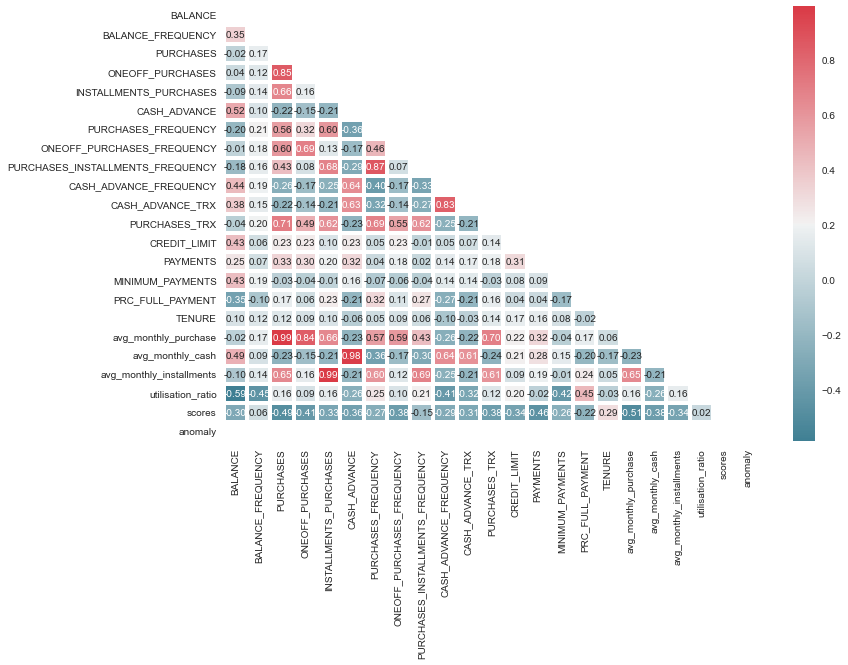

In [331]:
clean_corr = clean_df.corr()
plt.figure(figsize = (12, 8))

sns.heatmap(clean_corr, annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            linewidths=3, fmt=".2f", mask = np.triu(clean_corr))
plt.show()

1. Strong Correlations
- Purchases and One-off Purchases
- Purchases and Purchase Transactions
- Cash advance and Cash advance transactions
- Purchase Frequency and Purchase Instalments Frequency
- Instalment Purchases and Purchases Transactions

2. Medium Correlations:
- Balance and Cash Advance
- Balance and Cash Advance Frequency 
- Balance and Credit Limit
- Payments and Cash Advance
- Payments and Credit Limit

### 3.2 Continuous Variables Exploration

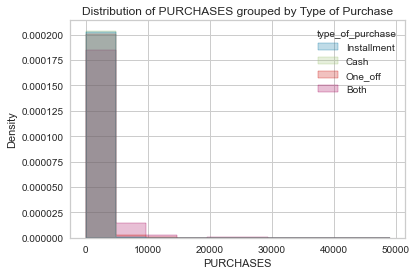

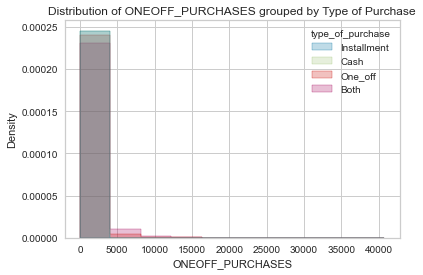

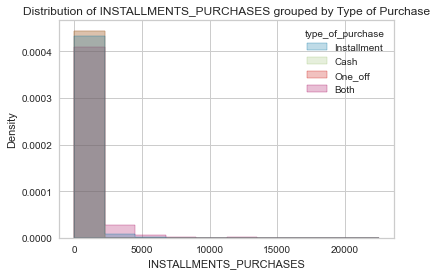

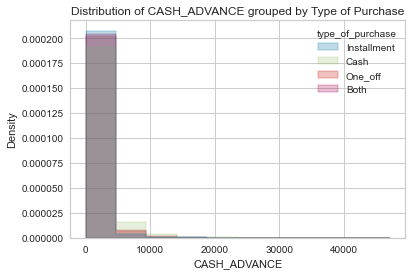

In [332]:
#Visualising the distribution density of independent continuous variables to the y variable: size, height, bust
viz_hist_cols = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE']

for col in viz_hist_cols:
    sns.histplot(data=df, x=col, bins=10, hue="type_of_purchase", element="step",stat="density", common_norm=False).set(title=f"Distribution of {col} grouped by Type of Purchase")
    plt.show()

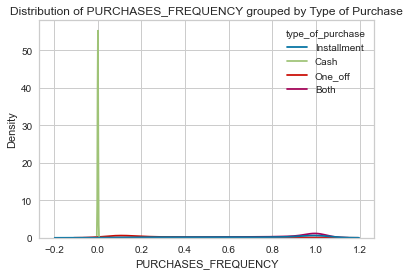

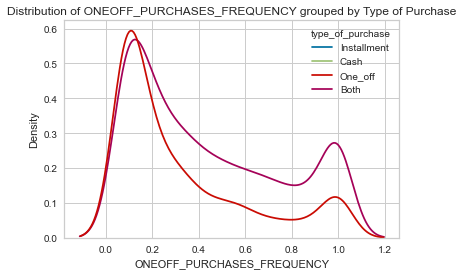

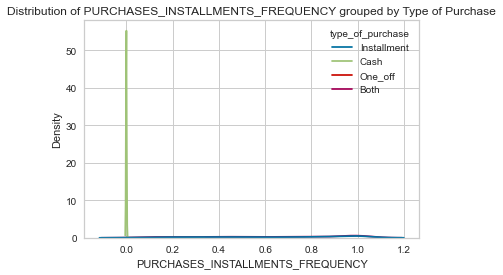

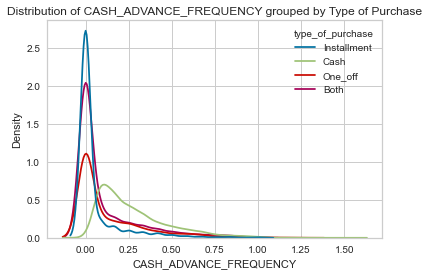

In [333]:
#Visualising the distribution density of weight and age
viz_kde_cols = ['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']

for col in viz_kde_cols:
    sns.kdeplot(data=df, x=col, hue="type_of_purchase").set(title=f"Distribution of {col} grouped by Type of Purchase")
    plt.show()

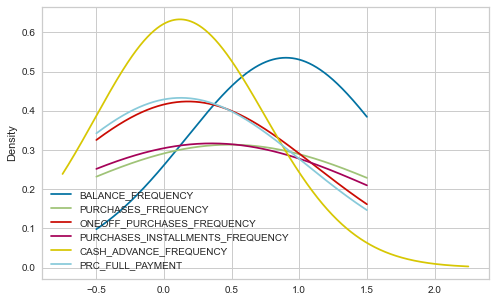

In [334]:
frequency_features = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
                      'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

df[frequency_features].plot.kde(figsize=(8,5), bw_method=3) #,ind=[0, 2, 3,4]
plt.show()

### 3.3 Joint Distribution Plots

In [335]:
clean_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'scores', 'anomaly'],
      dtype='object')

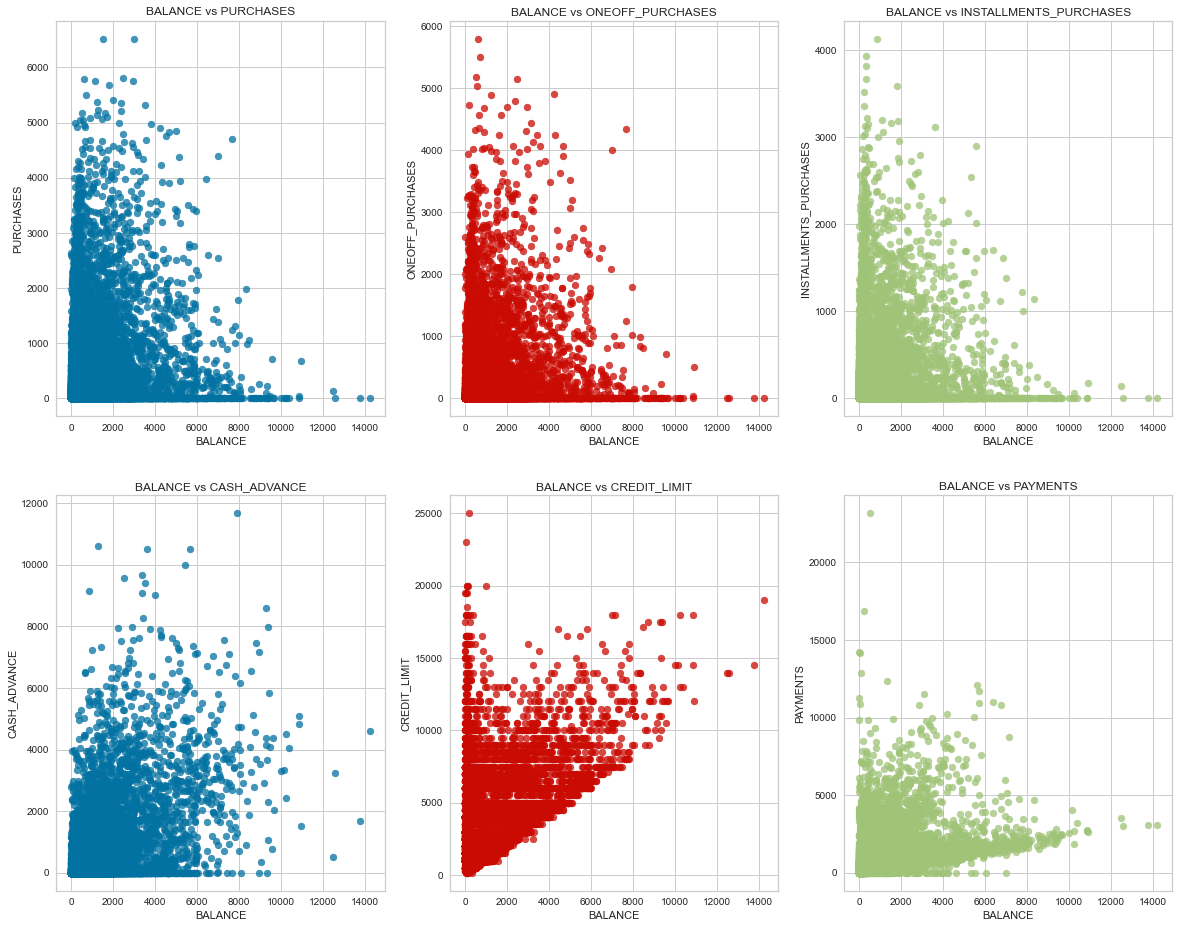

In [336]:
joint_var = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
plt.figure(figsize = (20,16))
joint_count = 0

colors = itertools.cycle(["r", "b", "g"])

for i, c in zip(joint_var, colors):
    plt.subplot(2, 3, joint_count + 1)
    joint_count += 1
    plt.scatter(clean_df['BALANCE'], clean_df[i], alpha = 0.75, color = next(colors))
    plt.title(f'BALANCE vs {i}')
    plt.xlabel('BALANCE')
    plt.ylabel(i)

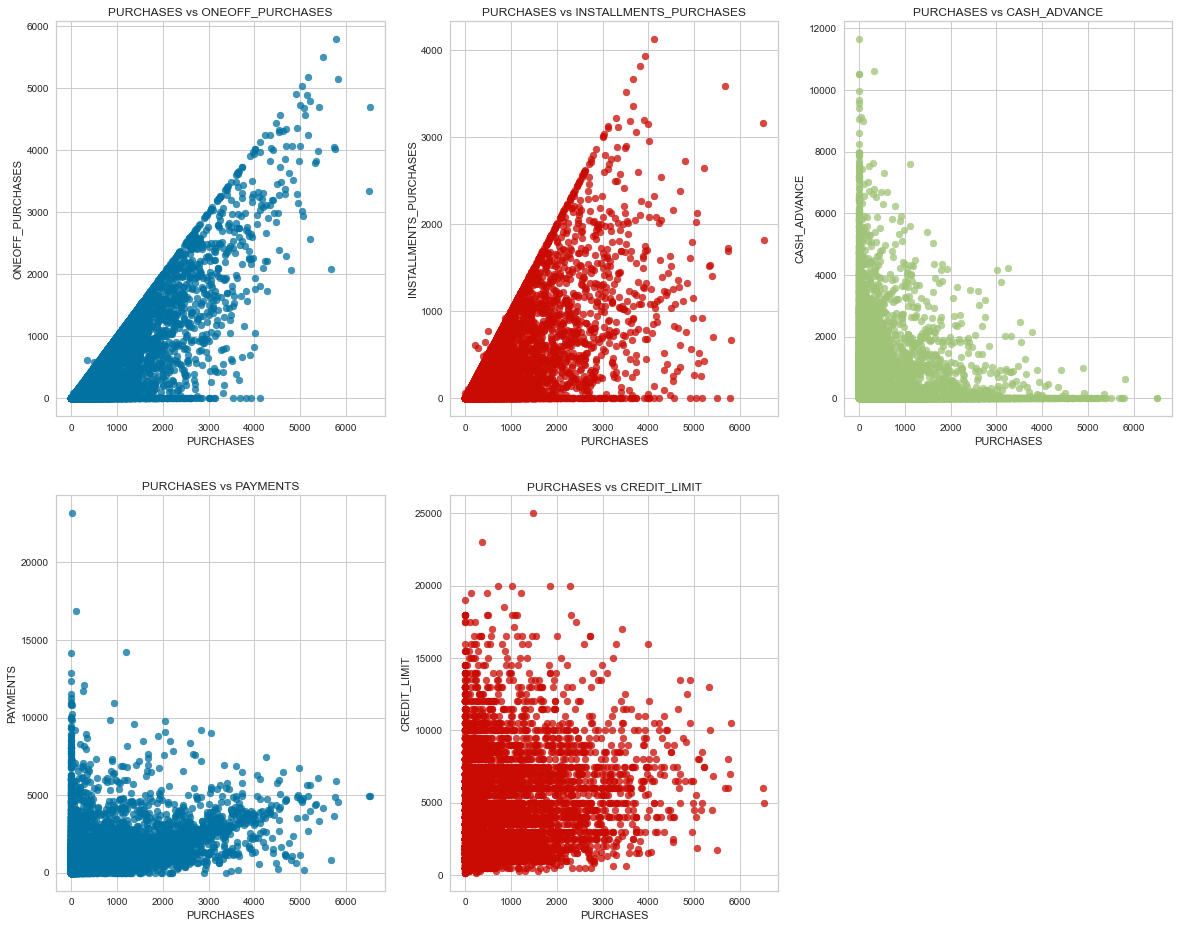

In [337]:
purchases_types = ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']
plt.figure(figsize = (20,16))
joint_count = 0

colors = itertools.cycle(["r", "b", "g"])

for i, c in zip(purchases_types, colors):
    plt.subplot(2, 3, joint_count + 1)
    joint_count += 1
    plt.scatter(clean_df['PURCHASES'], clean_df[i], alpha = 0.75, color = next(colors))
    plt.title(f'PURCHASES vs {i}')
    plt.xlabel('PURCHASES')
    plt.ylabel(i)

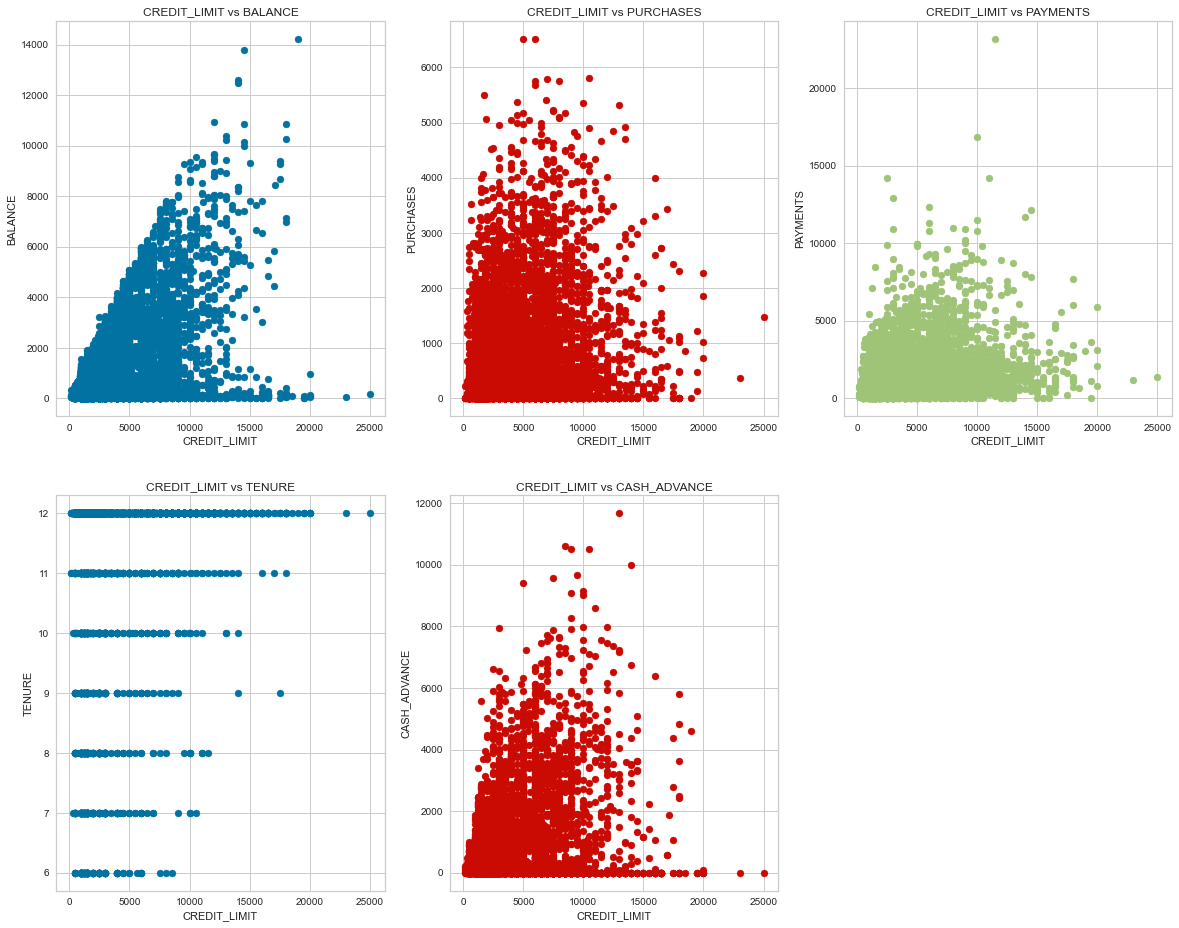

In [338]:
cl_joint = ['BALANCE', 'PURCHASES', 'PAYMENTS', 'TENURE', 'CASH_ADVANCE']
plt.figure(figsize = (20,16))
joint_count = 0

colors = itertools.cycle(["r", "b", "g"])

for i, c in zip(cl_joint, colors):
    plt.subplot(2, 3, joint_count + 1)
    joint_count += 1
    plt.scatter(clean_df['CREDIT_LIMIT'], clean_df[i], color = next(colors))
    plt.title(f'CREDIT_LIMIT vs {i}')
    plt.xlabel('CREDIT_LIMIT')
    plt.ylabel(i)

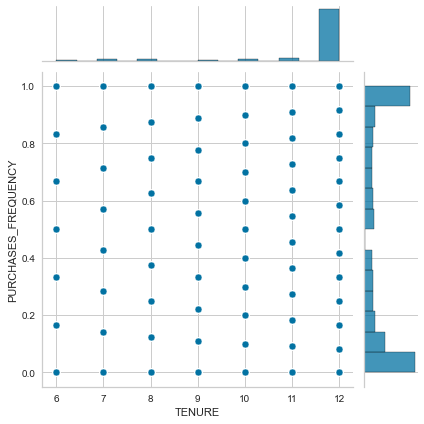

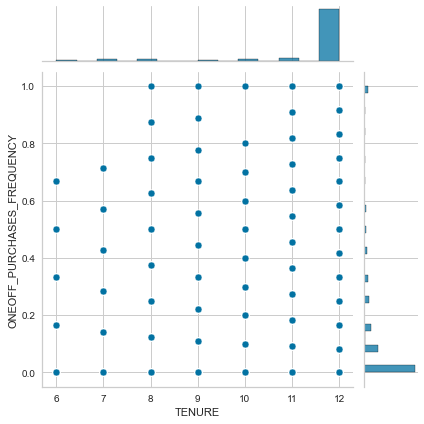

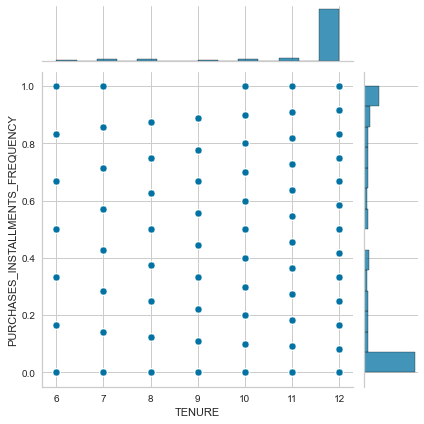

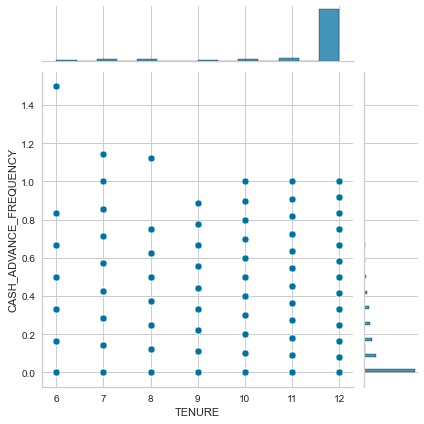

In [339]:
tenure_joint = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY']

for i in tenure_joint:
    sns.jointplot(x = 'TENURE', y = i, data = clean_df)
    plt.show()

### 3.4 Categorical Features Exploration

In this section, the variable 'type_of_purchase' will be mainly used to show the potential trends. The feature is mainly created to get an overview of the type of users in the dataset since it doesn't have categorical data (maybe except Tenure). However, this variable will not be used as part of the other models or clustering in the future sections as it may cloud the results. This is because the feature is similar to a label and may affect the process of unsupervised learning models.

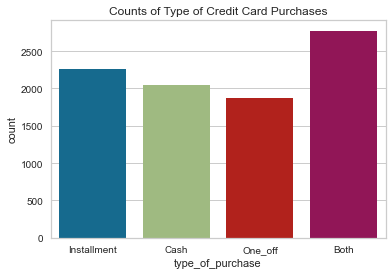

In [340]:
sns.countplot(data = df, x = 'type_of_purchase')
plt.title('Counts of Type of Credit Card Purchases')
plt.show()

In [341]:
#Most of these cardholders already seem to have long tenure periods.
df.groupby('type_of_purchase')['TENURE'].value_counts().unstack()

TENURE,6,7,8,9,10,11,12
type_of_purchase,,,,,,,
Both,29,30,36,28,51,81,2519
Cash,66,61,62,57,71,125,1599
Installment,64,56,47,55,54,73,1911
One_off,44,43,51,35,60,86,1555


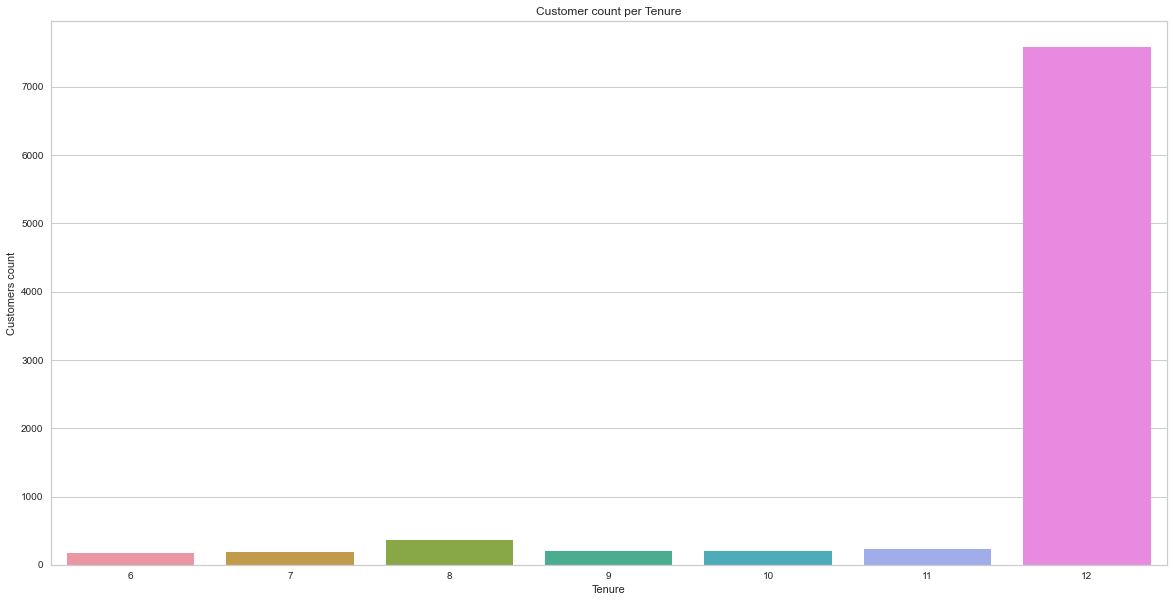

In [342]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = df['TENURE'].unique(), y = df['TENURE'].value_counts(dropna = False))
plt.xlabel('Tenure')
plt.ylabel('Customers count')
plt.title('Customer count per Tenure')
plt.show()
#Looks like most customers in the past 6 months are already long-term customers.

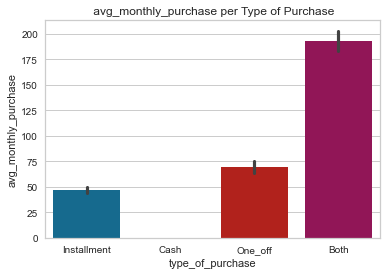

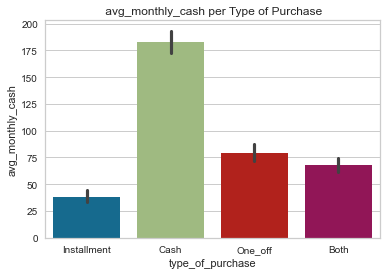

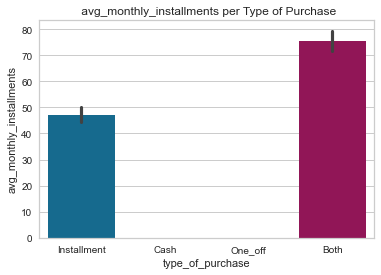

In [343]:
# Visualising spendings on type of purchase
spending_features = ['avg_monthly_purchase', 'avg_monthly_cash','avg_monthly_installments']

for col in spending_features:
    sns.barplot(data = df, x = 'type_of_purchase', y = col).set(title=f" {col} per Type of Purchase")
    plt.show()
    
# Based on this plot, it seems that every type of customers that are tagged by their type_of_purchase seem to use Cash Advance as seen in the 2nd chart.

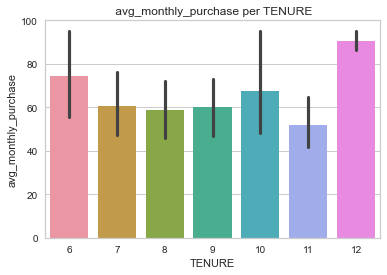

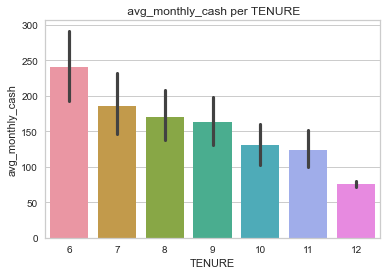

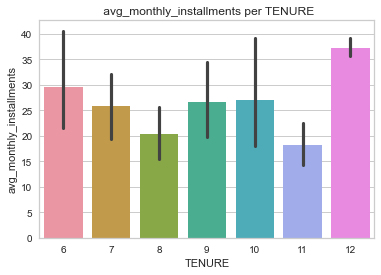

In [344]:
# Visualising spendings on tenure duration
for col in spending_features:
    sns.barplot(data = df, x = 'TENURE', y = col).set(title=f" {col} per TENURE")
    plt.show()

#Interestingly, people who shorter tenure also tend to use a higher amount of Cash Advance.

### 3.5 Factor Analysis (Determining Variance in Features)

In [345]:
clean_df.drop(columns ='scores' , axis=1 , inplace=True)
clean_df.drop(columns ='anomaly' , axis=1 , inplace=True)
x = clean_df.copy()
chi_square_value, p_value = calculate_bartlett_sphericity(x)
chi_square_value, p_value #statistically significant

(268030.290226699, 0.0)

KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated.

In [346]:
kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model, len(kmo_all)) 

0.7184715036935703 21


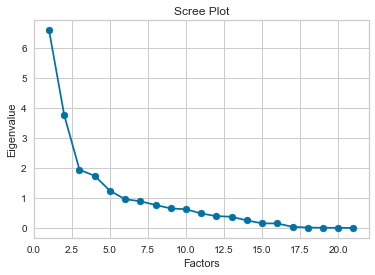

In [347]:
fa = FactorAnalyzer()
fa.fit(x, 23)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()

#plot eigenvector values
plt.scatter(range(1, x.shape[1] + 1),ev)
plt.plot(range(1, x.shape[1] + 1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()
#Use 3 factors here since the drop is huge on 3 factors onwards

In [348]:
fa = FactorAnalyzer(n_factors=3,rotation ='varimax')
fa.fit(x)
loads = fa.loadings_
print(pd.DataFrame(fa.loadings_, index = x.columns))

                                         0         1         2
BALANCE                           0.717611 -0.067802  0.147778
BALANCE_FREQUENCY                 0.309259  0.186647  0.175637
PURCHASES                        -0.101464  0.479945  0.841653
ONEOFF_PURCHASES                 -0.100340 -0.029232  0.970183
INSTALLMENTS_PURCHASES           -0.053201  0.905600  0.206100
CASH_ADVANCE                      0.833209 -0.151573 -0.073337
PURCHASES_FREQUENCY              -0.296098  0.683398  0.326636
ONEOFF_PURCHASES_FREQUENCY       -0.130468  0.043967  0.720099
PURCHASES_INSTALLMENTS_FREQUENCY -0.216774  0.822574  0.062263
CASH_ADVANCE_FREQUENCY            0.753935 -0.200714 -0.123618
CASH_ADVANCE_TRX                  0.708898 -0.154482 -0.097806
PURCHASES_TRX                    -0.114294  0.592279  0.533814
CREDIT_LIMIT                      0.237636  0.044808  0.312824
PAYMENTS                          0.327525  0.116775  0.347878
MINIMUM_PAYMENTS                  0.326207  0.017398  0

In [349]:
#Factor 1: 
factor_1 = pd.DataFrame(fa.loadings_, index=x.columns)
factor_1 = factor_1[factor_1[0] > 0.4]
print("Factor 1: ", factor_1.index)

#Factor 2:
factor_2 = pd.DataFrame(fa.loadings_, index=x.columns)
factor_2 = factor_2[factor_2[1] > 0.4]
print("Factor 2: ", factor_2.index)

#Factor 3: 
factor_3 = pd.DataFrame(fa.loadings_, index=x.columns)
factor_3 = factor_3[factor_3[2] > 0.4]
print("Factor 3: ", factor_3.index)

Factor 1:  Index(['BALANCE', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'avg_monthly_cash'],
      dtype='object')
Factor 2:  Index(['PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX',
       'avg_monthly_purchase', 'avg_monthly_installments'],
      dtype='object')
Factor 3:  Index(['PURCHASES', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_TRX', 'avg_monthly_purchase'],
      dtype='object')


In [350]:
#Create the factors
factor1 = x[factor_1.index]
factor2 = x[factor_2.index]
factor3 = x[factor_3.index]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)
#Factor 3 isnt as useful compared to factors 1 and 2

(0.47695722538182883, array([0.459, 0.495])) (0.5341822004807342, array([0.518, 0.55 ])) (0.6285075638288187, array([0.616, 0.641]))


In [351]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          3.850917  3.839926  3.663729
Proportional Var  0.183377  0.182854  0.174463
Cumulative Var    0.183377  0.366231  0.540694


In [352]:
# Communality is the proportion of each variable’s variance 
# that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.
print(pd.DataFrame(fa.get_communalities(), index=x.columns, columns=['Communalities']))

                                  Communalities
BALANCE                                0.541401
BALANCE_FREQUENCY                      0.161327
PURCHASES                              0.949022
ONEOFF_PURCHASES                       0.952178
INSTALLMENTS_PURCHASES                 0.865418
CASH_ADVANCE                           0.722590
PURCHASES_FREQUENCY                    0.661398
ONEOFF_PURCHASES_FREQUENCY             0.537497
PURCHASES_INSTALLMENTS_FREQUENCY       0.727495
CASH_ADVANCE_FREQUENCY                 0.623986
CASH_ADVANCE_TRX                       0.535967
PURCHASES_TRX                          0.648815
CREDIT_LIMIT                           0.156338
PAYMENTS                               0.241928
MINIMUM_PAYMENTS                       0.106810
PRC_FULL_PAYMENT                       0.155442
TENURE                                 0.021387
avg_monthly_purchase                   0.926546
avg_monthly_cash                       0.684150
avg_monthly_installments               0

## 4. Customer Segmentation / Clustering

In [353]:
#Scaling the dataframe features before clustering
scaler = StandardScaler()
scaled_features=scaler.fit_transform(clean_df)

#Created scaled_df for any reference afterwards.
scaled_df=pd.DataFrame(scaler.fit_transform(clean_df), columns = clean_df.columns)

### Elbow Method

In [354]:
params = {"init":"random","n_init":10,"max_iter":300,"random_state":0}
cluster_range = range( 1, 21 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **params) #** open dictionry
    kmeans.fit(scaled_features)
    cluster_errors.append(kmeans.inertia_) 

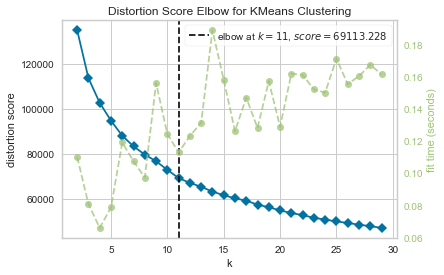

In [355]:
model = KMeans(n_clusters=k, **params)

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(scaled_features)        
visualizer.show()        
plt.show()

### Knee Method (Kneed)

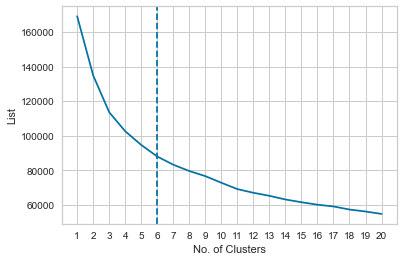

In [356]:
k1 = KneeLocator(range(1,21), cluster_errors , curve='convex', direction= 'decreasing')
plt.plot(range(1, 21), cluster_errors)
plt.xticks(range(1, 21))
plt.xlabel('No. of Clusters')
plt.ylabel('List')
plt.axvline(x = k1.elbow, color='b', ls= '--')
plt.show()

### Silhouette Coefficient

In [357]:
silhouette_coefficients =[]
#min of clusters is 2
for k in range(2, 21):
    kmeans = KMeans(n_clusters = k, **params)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

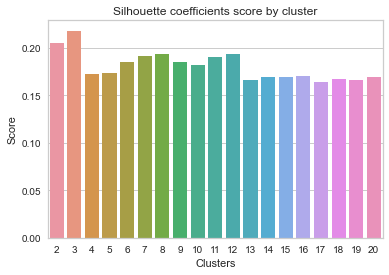

In [358]:
k = [i for i in range(2,21)]
ax = sns.barplot(x = k, y = silhouette_coefficients) # k = 3 seems to have the highest score
ax.set(xlabel = 'Clusters', ylabel = 'Score')
plt.title('Silhouette coefficients score by cluster')
plt.show()

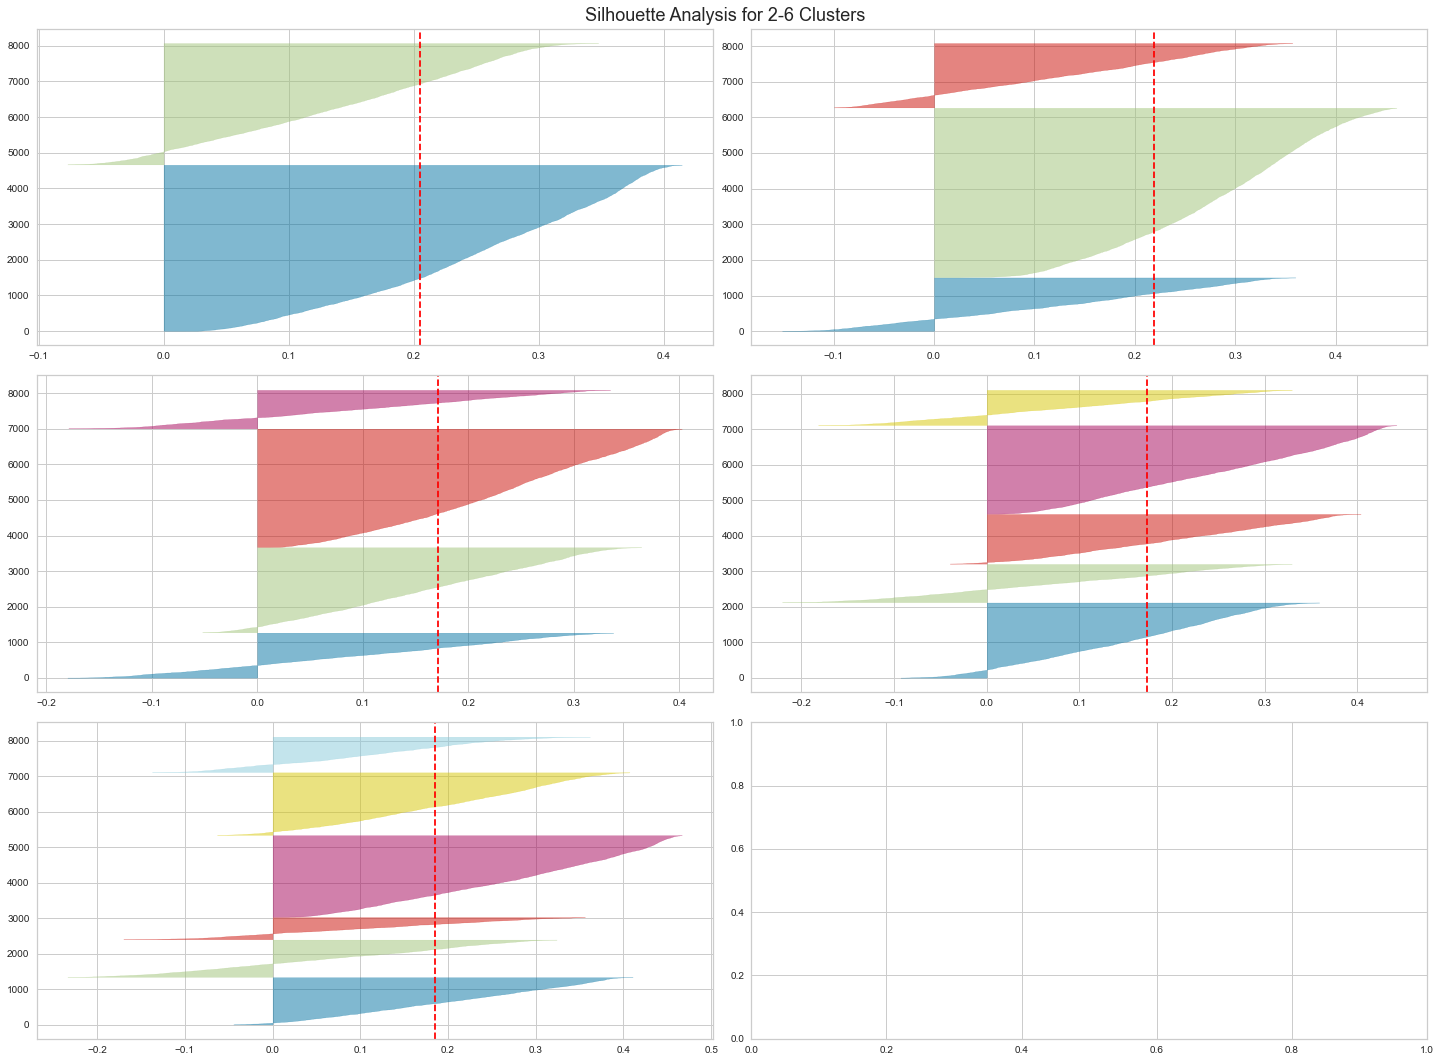

In [422]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Silhouette Analysis for 2-6 Clusters', size = 18)
plt.tight_layout()

for i in range(2,7):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 0)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(scaled_features)
    #visualizer.show()

### Dendograms

In [360]:
distance = linkage(scaled_features, 'ward')

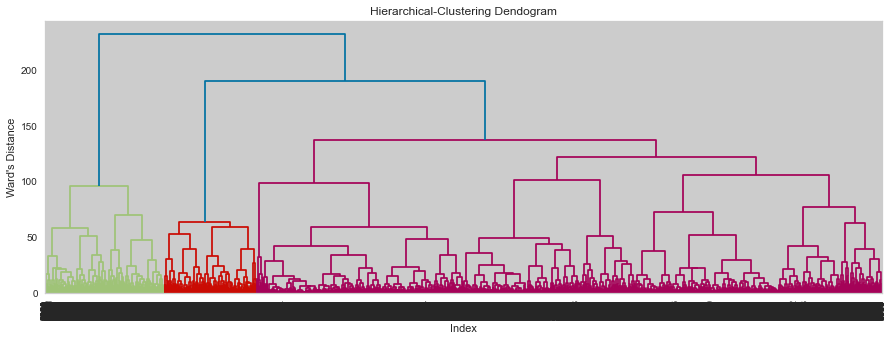

In [361]:
plt.figure(figsize=(15,5))
plt.title("Hierarchical-Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Ward's Distance")
dendrogram(distance, leaf_rotation=90, leaf_font_size=9); #Takes awhile to run!
#plt.axhline(160, c='k')
plt.show()
#Based on the dendogram, to cut off the longest line the graph, we chose a line within 140 to 170.

### K-means Model

In [362]:
km_model = KMeans(n_clusters = 4, random_state = 0)
y_pred_km = km_model.fit_predict(scaled_features)

In [363]:
#centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = [clean_df.columns])
#centroids

In [364]:
clean_df['labels'] = km_model.labels_

In [365]:
clean_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'labels'],
      dtype='object')

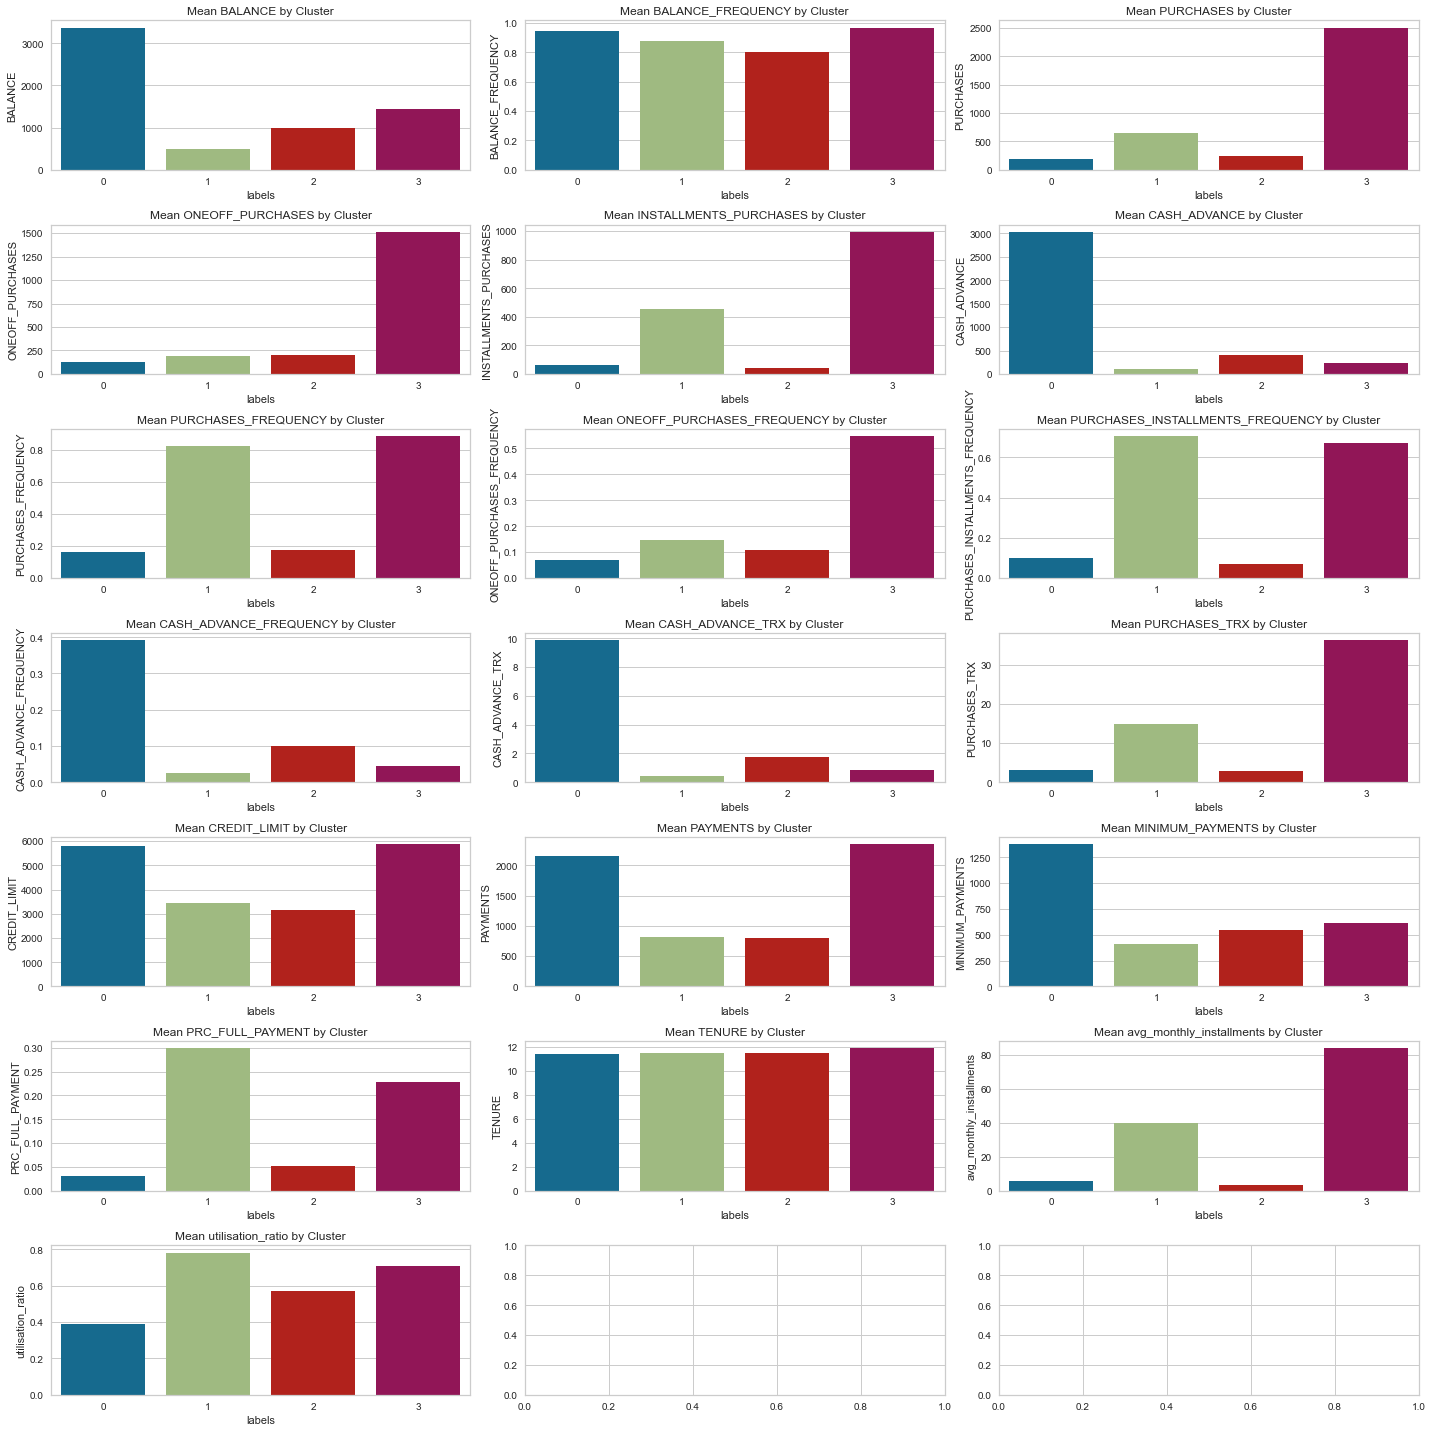

In [366]:
base_features = df.drop(columns = ['avg_monthly_purchase', 'avg_monthly_cash', 'type_of_purchase']).columns
fig = plt.subplots(nrows = 7, ncols = 3, figsize = (20,20))
counter = 0

for i in base_features:
    plt.subplot(7, 3, counter + 1)
    counter += 1
    ax = sns.barplot(x = clean_df.groupby(clean_df['labels']).mean().index, 
                y = i, data = clean_df.groupby(clean_df['labels']).mean())
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.tight_layout()

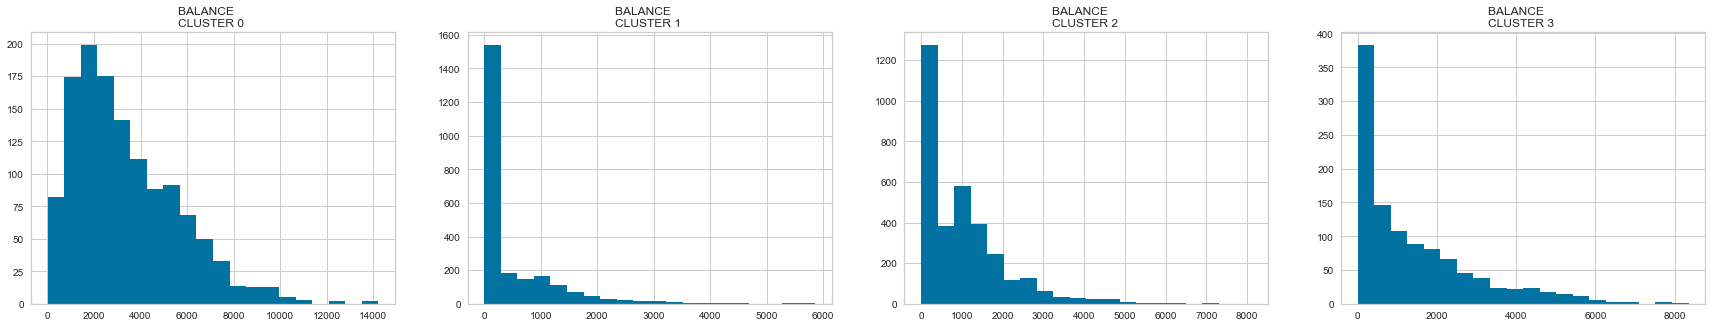

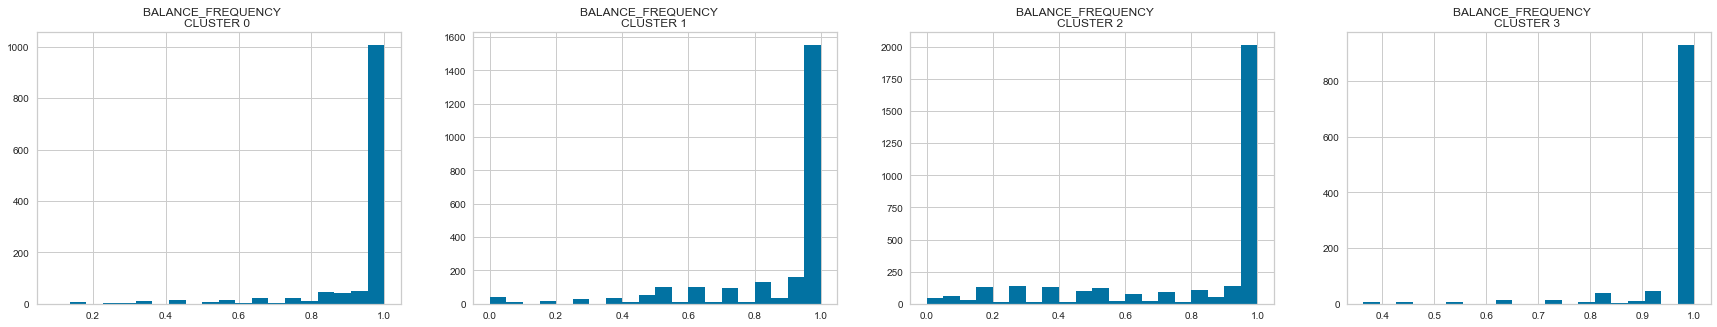

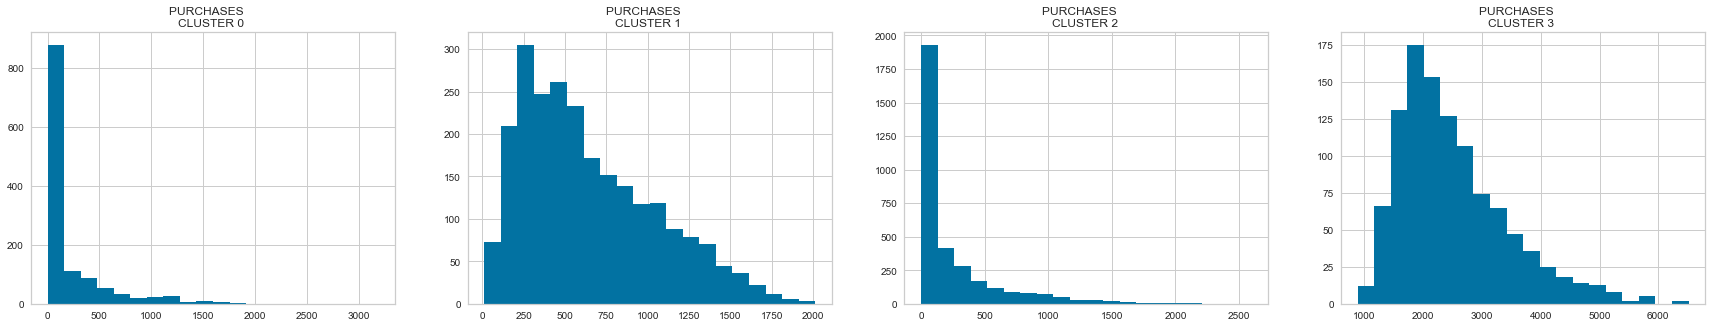

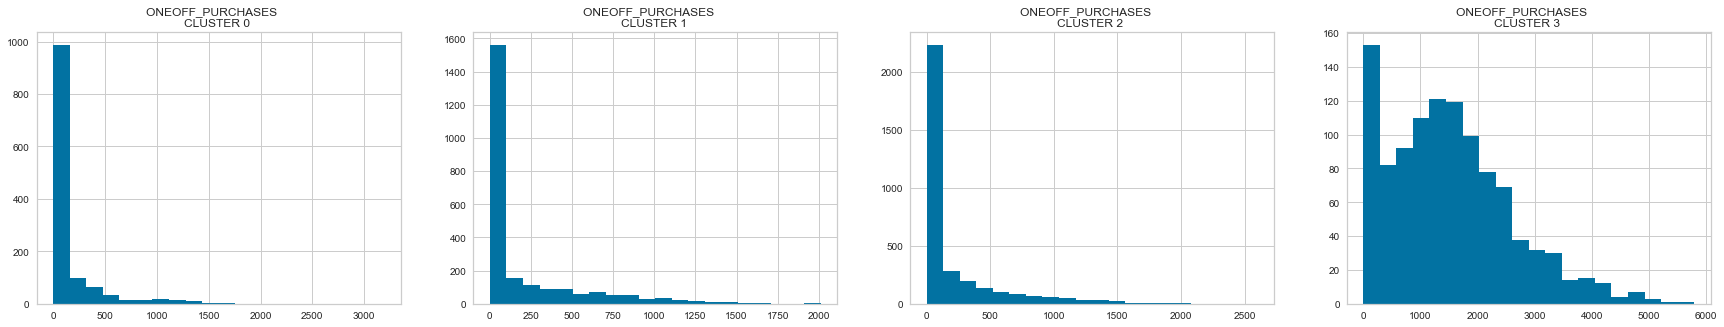

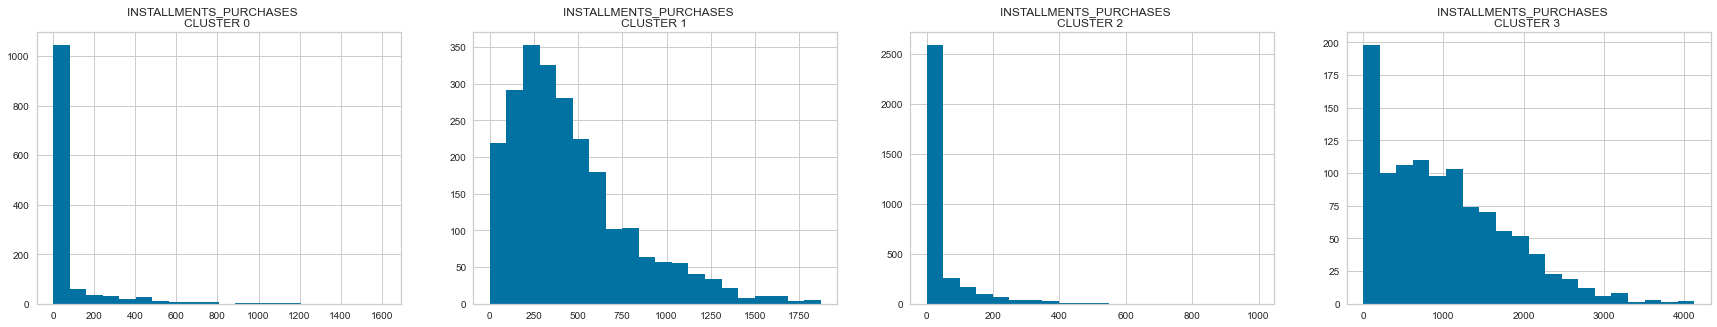

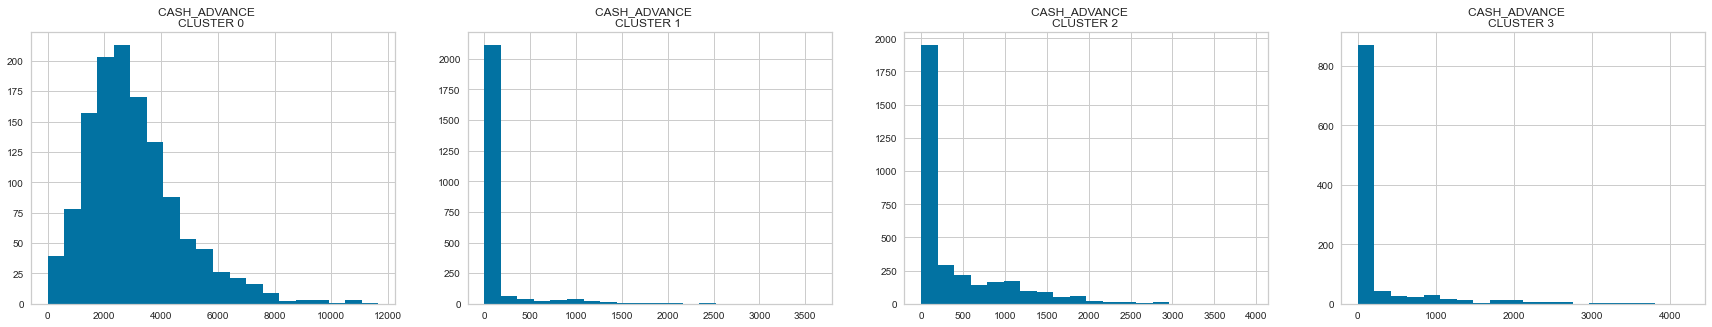

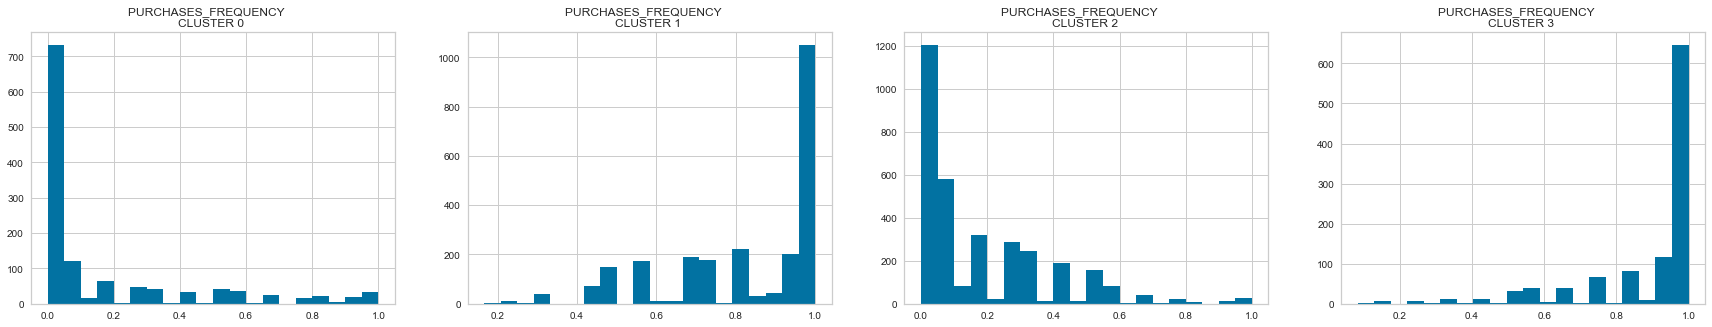

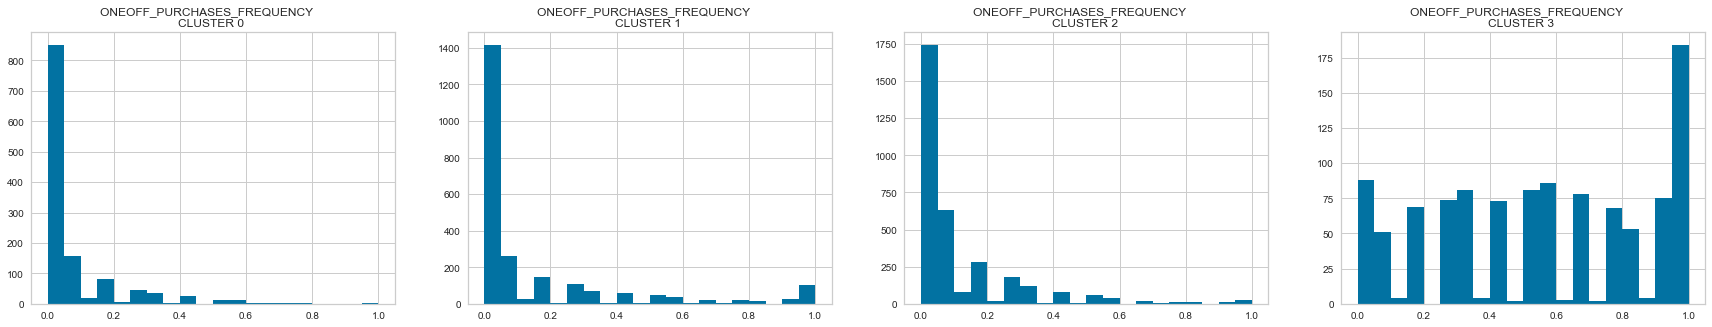

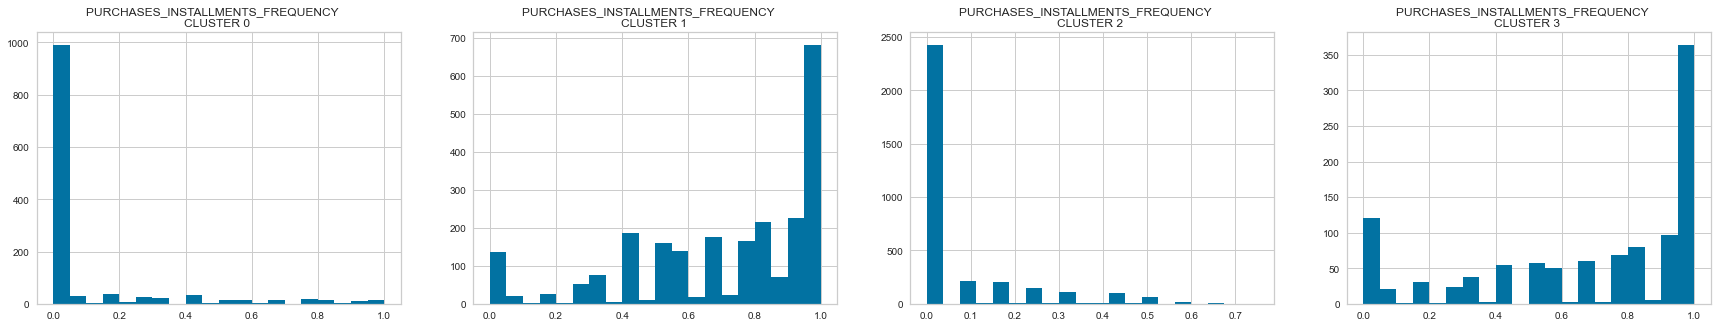

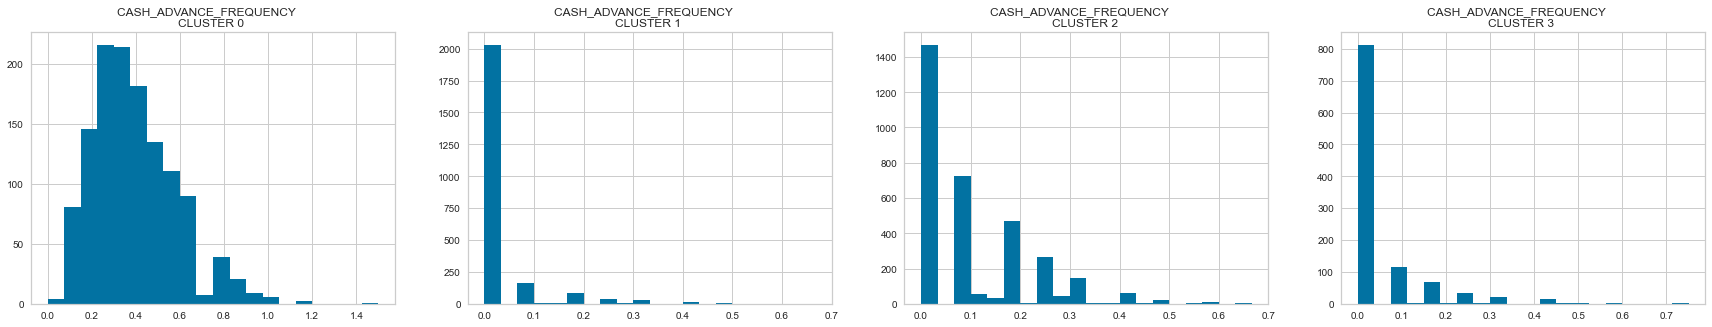

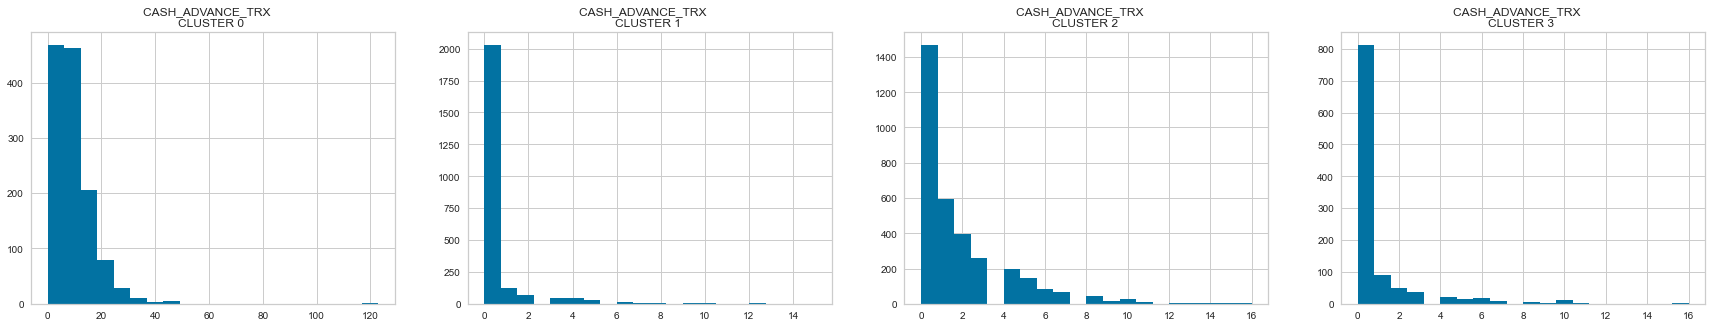

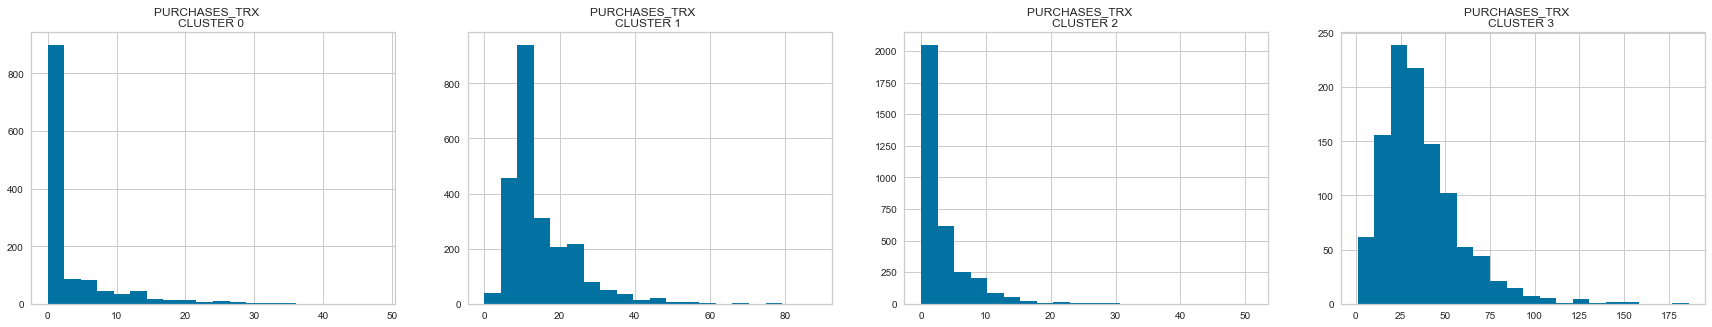

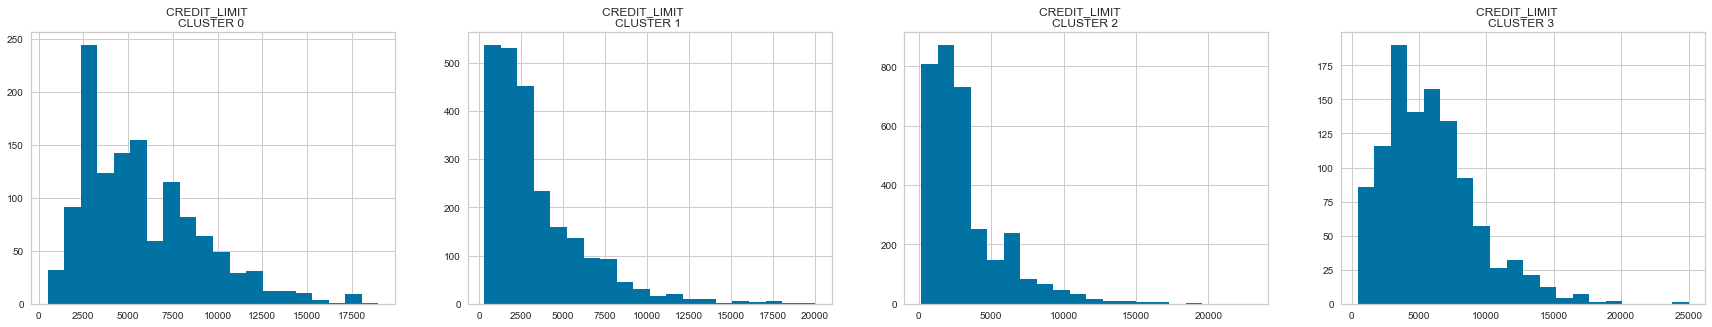

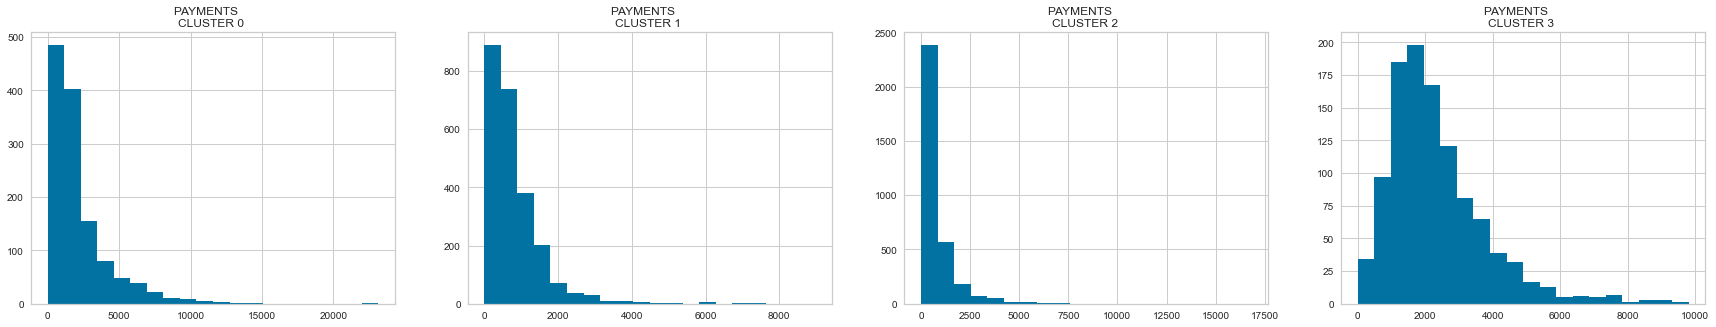

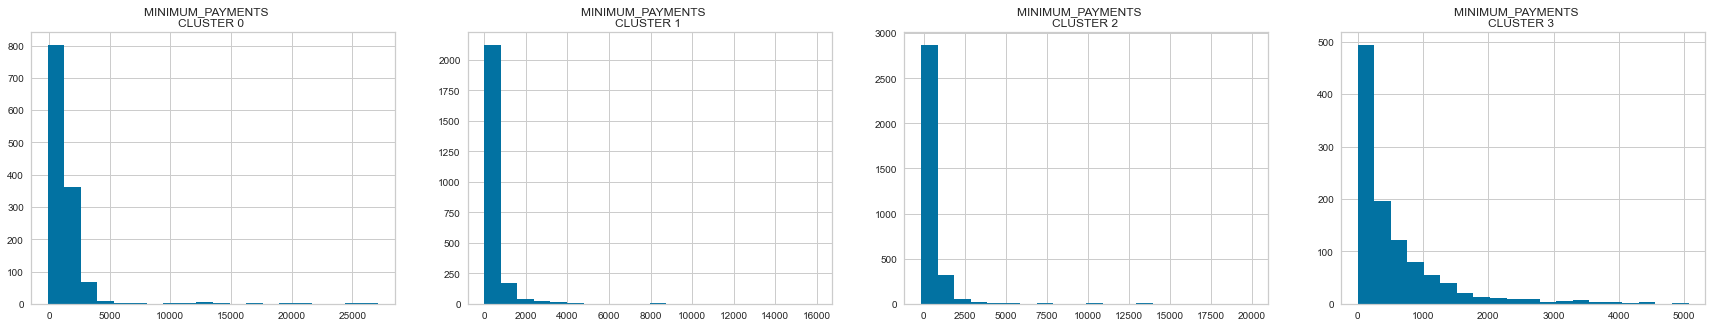

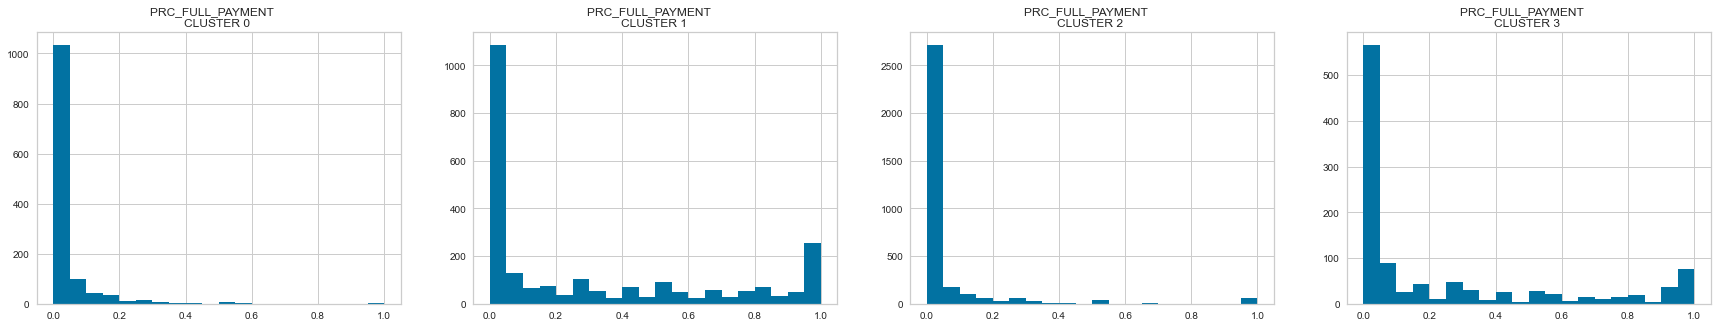

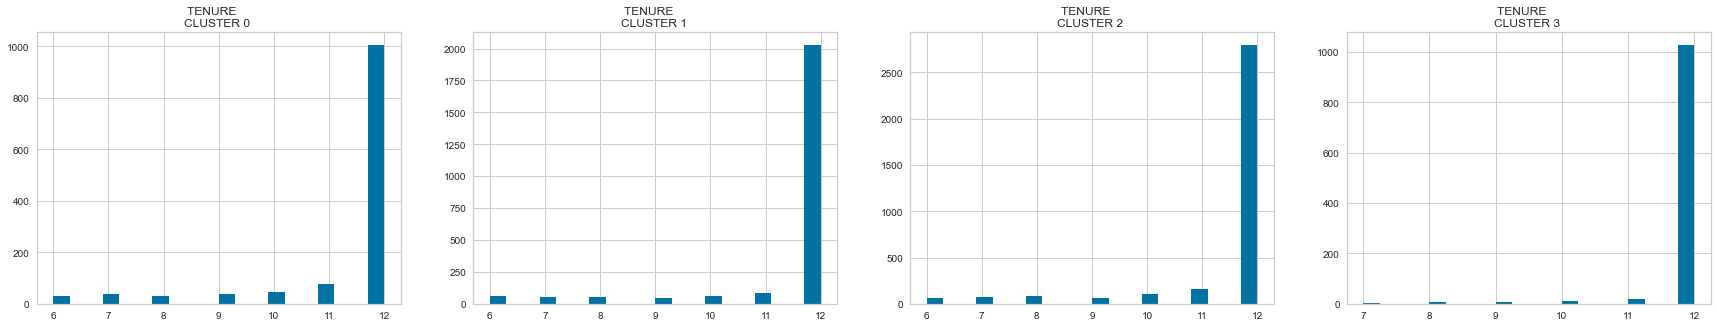

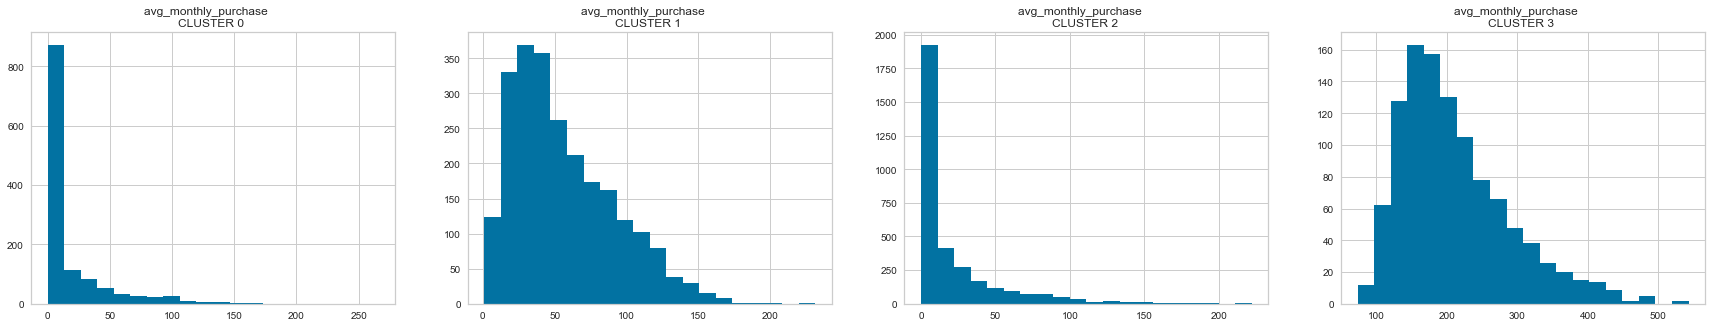

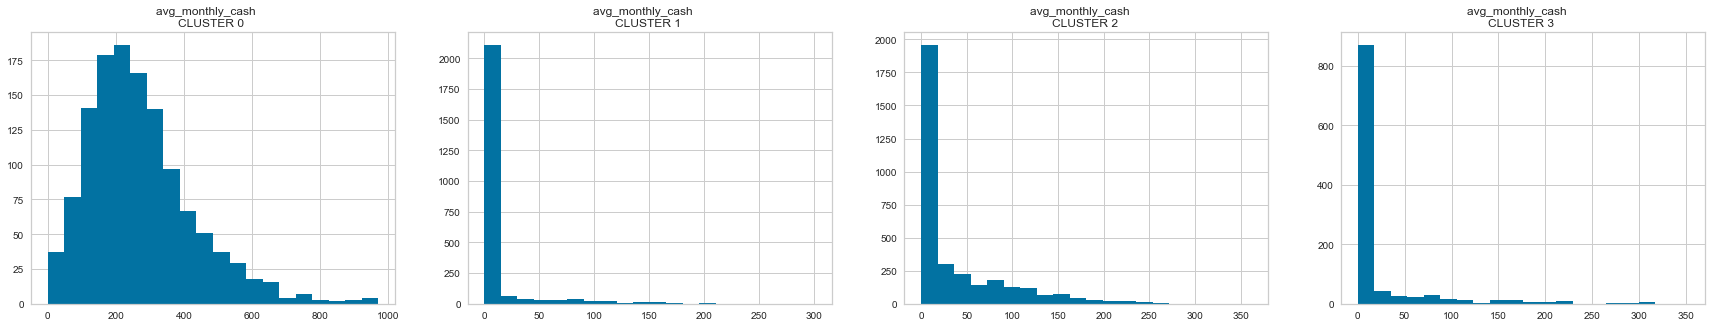

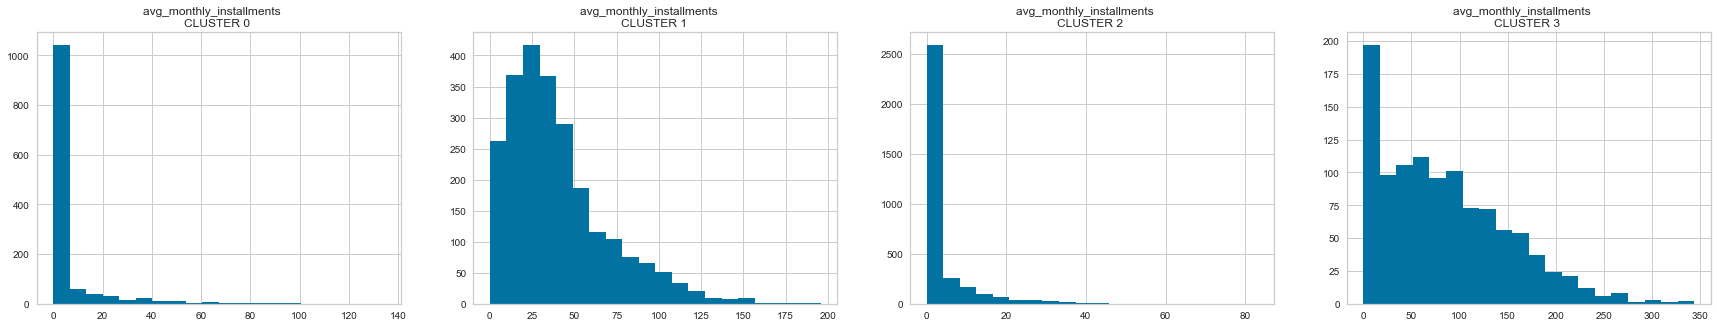

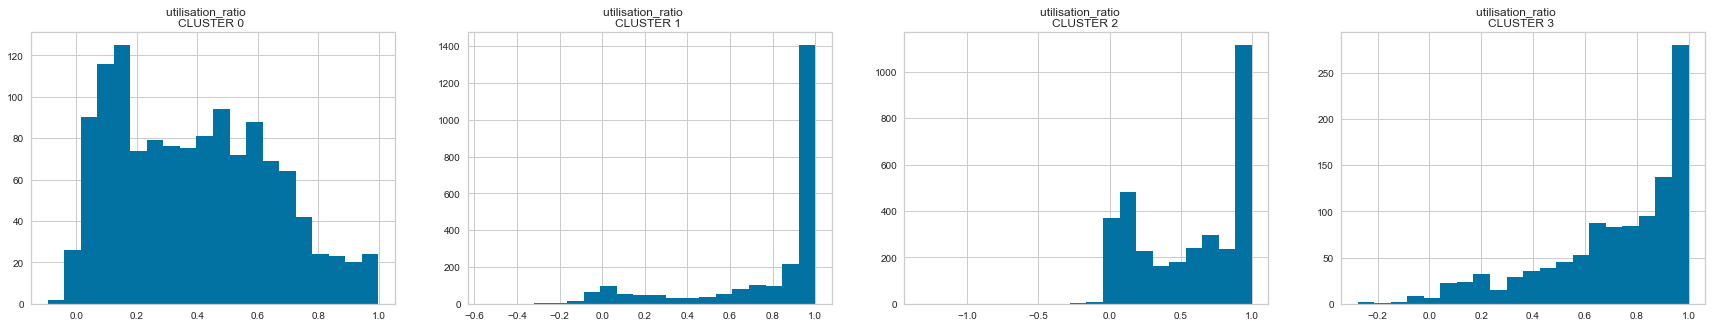

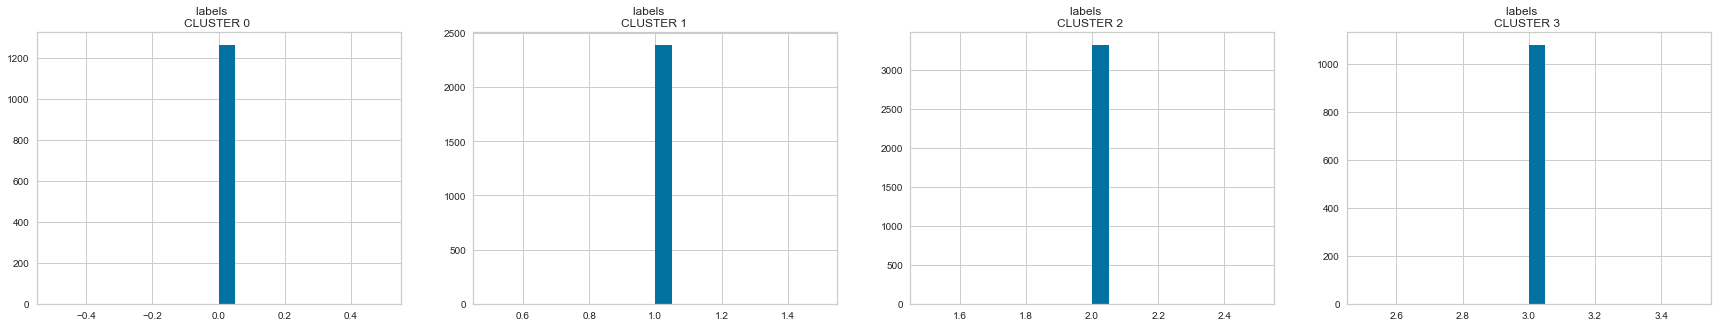

In [367]:
# Plot the histogram of various clusters
for i in clean_df.columns:
    plt.figure(figsize = (30, 5))
    for j in range(clean_df['labels'].nunique()):
        plt.subplot(1, clean_df['labels'].nunique(), j+1)
        ax = clean_df[clean_df['labels'] == j]
        ax[i].hist(bins=20)
        plt.title('{}    \nCLUSTER {} '.format(i, j))
plt.show()

In [368]:
#Lets visualise the clusters in 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.892069,-2.310673
1,-3.969607,3.551441
2,1.092476,0.471558
3,0.008330,-0.077428
4,-1.430943,-1.455890


In [369]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': km_model.labels_})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.892069,-2.310673,2
1,-3.969607,3.551441,0
2,1.092476,0.471558,1
3,0.008330,-0.077428,2
4,-1.430943,-1.455890,2


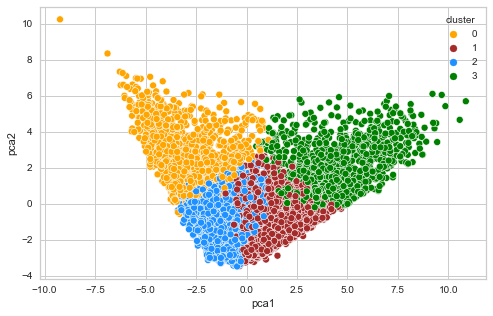

In [426]:
# Visualize the clusters in 2-axes plane
plt.figure(figsize = (8,5))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette=['orange','brown','dodgerblue', 'green', 'red', 'blue'])
plt.show()

### TSNE Plot

In [417]:
tsne_model = make_pipeline(StandardScaler(), TSNE(n_components = 2, random_state = 0))
tsne_data = tsne_model.fit_transform(clean_df)

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, clean_df.labels)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

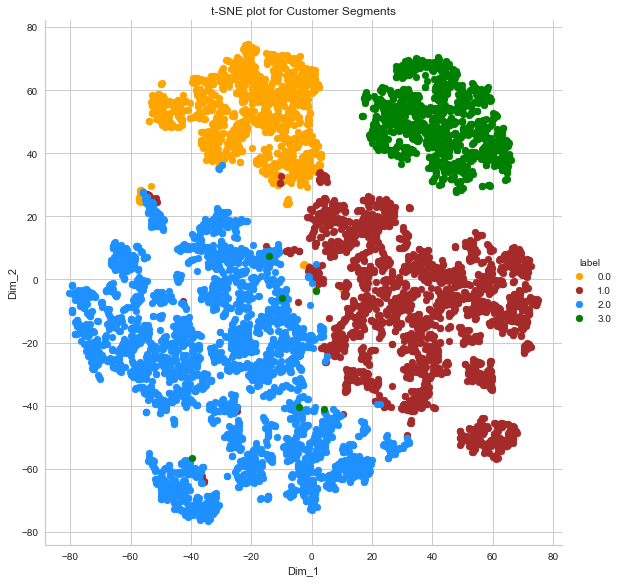

In [430]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", height=8, palette=['orange','brown','dodgerblue', 'green', 'red', 'blue']).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot for Customer Segments')
plt.show()

## 6. Behavioural Analysis

In [371]:
#available features

#purchases = ['PURCHASES', 'ONEOFF_PURCHASES',
#        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE]
#frequency = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
#                'CASH_ADVANCE_FREQUENCY', 'BALANCE_FREQUENCY']
#monthly = ['avg_monthly_purchase', 'avg_monthly_cash',
#        'avg_monthly_installments']
#others = ['utilisation_ratio','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
#        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'BALANCE']

In [435]:
#Adjust Features here
Purchase = ["PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES",
                      'ONEOFF_PURCHASES', 'BALANCE', #'PAYMENTS', 
                      "CREDIT_LIMIT", 'PAYMENTS',  'MINIMUM_PAYMENTS', 'labels']

Count = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'TENURE', 'labels']

Frequency = ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY', 'utilisation_ratio', 'labels']

all_features = [Purchase, Count, Frequency]

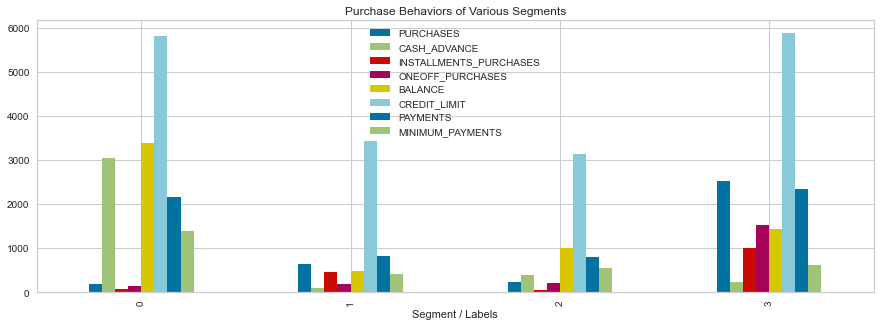

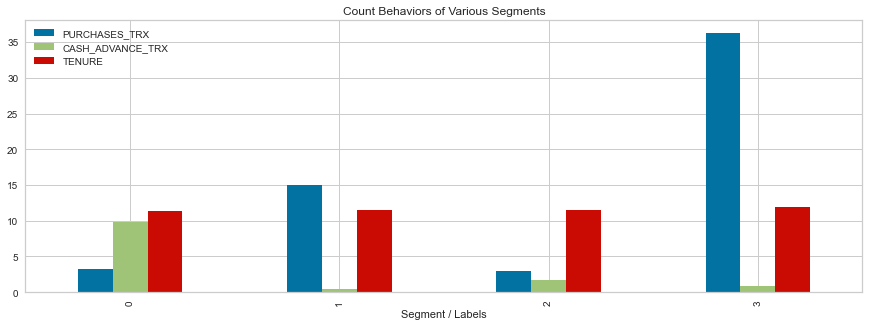

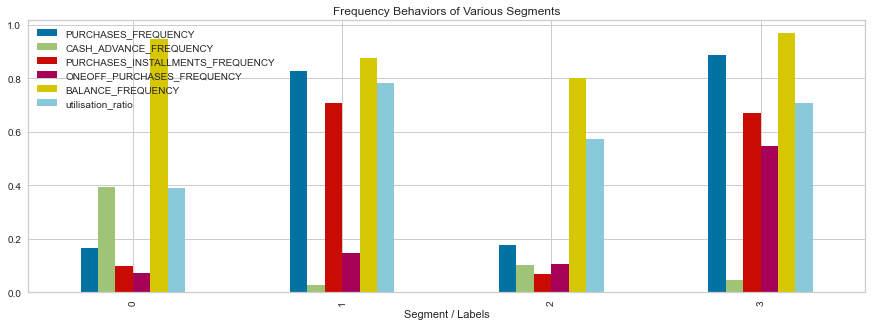

2    3322
1    2388
0    1264
3    1080
Name: labels, dtype: int64

In [436]:
counter = 0
for i in all_features:
    name = ''
    if counter == 0:
        name = 'Purchase'
    elif counter == 1:
        name = 'Count'
    else:
        name = 'Frequency'
    counter += 1
    
    clean_df[i].groupby(['labels']).mean().plot.bar(figsize = (15,5))
    plt.title(f'{name} Behaviors of Various Segments')
    plt.xlabel('Segment / Labels');
    plt.show()

clean_df['labels'].value_counts()

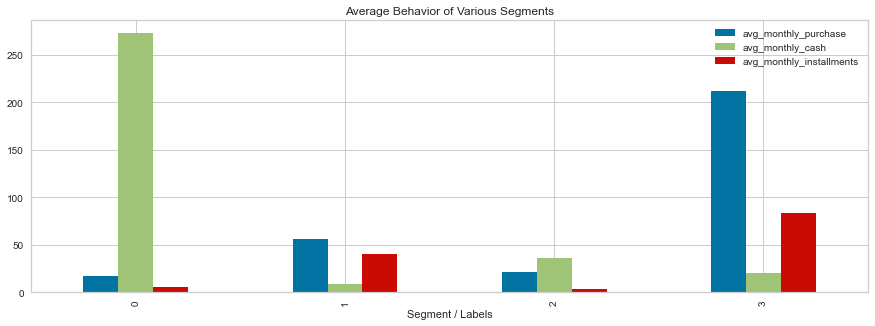

In [438]:
#'avg_monthly_payments' either way if they use the card, they'll make payments
avg_features = ['avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_installments', 'labels']
analysis_df = clean_df.copy()

analysis_df[avg_features].groupby("labels").mean().plot.bar(figsize=(15, 5))

plt.title('Average Behavior of Various Segments')
plt.xlabel('Segment / Labels');
plt.show()

In [439]:
# get the values for each col grouped by cluster
behavior_table = clean_df.groupby('labels')[["PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES",
                      'ONEOFF_PURCHASES', 'utilisation_ratio', #'PAYMENTS', 
                      "CREDIT_LIMIT", 'PAYMENTS','MINIMUM_PAYMENTS', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX']]

n_customers = behavior_table.size()
#description['n_customers'] = n_customers
behavior_table = behavior_table.mean()
behavior_table.style.background_gradient(cmap='YlGnBu')

,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,utilisation_ratio,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PURCHASES_TRX,CASH_ADVANCE_TRX
labels,,,,,,,,,,
0,194.430704,3036.237589,62.569747,131.941392,0.389465,5807.572161,2152.407807,1376.104796,3.205696,9.878165
1,645.100000,98.593025,454.099824,191.595059,0.781522,3427.617993,809.069597,413.968638,14.975293,0.464405
2,238.638805,399.125205,38.169943,200.617381,0.572499,3137.764399,807.628747,547.868882,2.982541,1.733293
3,2510.583880,236.179602,996.028009,1514.601241,0.708682,5871.742424,2349.106477,613.505753,36.230556,0.825000


In [376]:
avg_behavior_df = clean_df.groupby("labels")[['avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_installments', 'utilisation_ratio']].mean()
avg_behavior_df = pd.DataFrame(MinMaxScaler().fit_transform(avg_behavior_df), 
                            index=avg_behavior_df.index, columns=avg_behavior_df.columns)
avg_behavior_df

,avg_monthly_purchase,avg_monthly_cash,avg_monthly_installments,utilisation_ratio
labels,,,,
0,0.000000,1.000000,0.026560,0.000000
1,0.202855,0.000000,0.455741,1.000000
2,0.021702,0.102621,0.000000,0.466856
3,1.000000,0.041270,1.000000,0.814212


## 7. Multinomial Logistic Regression
### Base Model

In [377]:
X = clean_df.copy()
y = X['labels']
X = X.drop(columns = ['labels'], axis = 1)

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 0)

In [379]:
#transformer = FactorAnalysis(n_components=3, random_state=0)

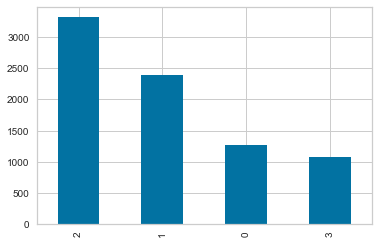

In [380]:
y.value_counts().plot(kind = 'bar')
plt.show()

In [381]:
lr_model = make_pipeline(StandardScaler(), #transformer, 
                         LogisticRegression(multi_class='auto', random_state = 0))
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

Accuracy:  0.9906890130353817
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       253
           1       0.99      0.99      0.99       478
           2       0.99      1.00      0.99       664
           3       0.98      0.99      0.98       216

    accuracy                           0.99      1611
   macro avg       0.99      0.99      0.99      1611
weighted avg       0.99      0.99      0.99      1611



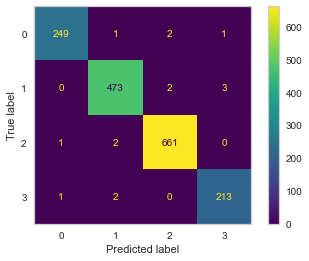

In [382]:
print('Accuracy: ', accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))
cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

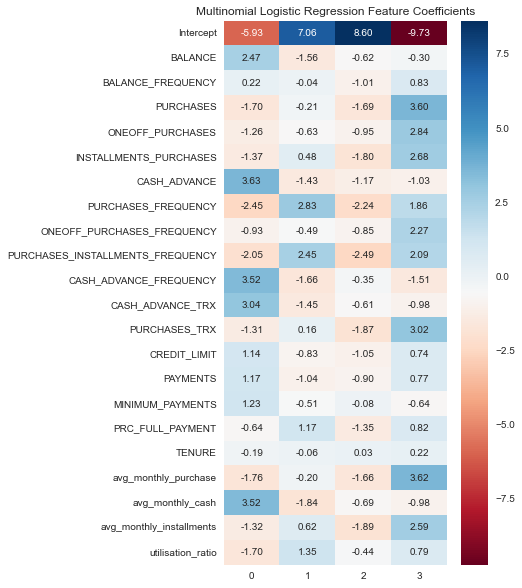

In [383]:
lr_coef = pd.DataFrame(lr_model.named_steps['logisticregression'].coef_, columns = X.columns).T
# lr_coef = pd.DataFrame(lr_model.named_steps['logisticregression'].coef_, 
#                       columns = lr_model.named_steps['factoranalysis'].get_feature_names_out()).T
lr_bias = pd.DataFrame(lr_model.named_steps['logisticregression'].intercept_, columns = ['Intercept']).T
lr_weights = pd.concat([lr_bias, lr_coef], axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(5, 10))
sns.heatmap(lr_weights, annot = True, cmap='RdBu', ax = ax, fmt ='.2f')
plt.title('Multinomial Logistic Regression Feature Coefficients')
plt.show()

### Updated Model (Removed Multicollinearity)
Check for Multicollinearity

In [384]:
vif = pd.DataFrame()
vif['feature'] = scaled_df.columns
vif['VIF'] = [variance_inflation_factor(scaled_df.values, i ) for i in range(len(scaled_df.columns))]

In [385]:
vif.sort_values("VIF", ascending=False)

,feature,VIF
2,PURCHASES,13419.327502
3,ONEOFF_PURCHASES,7601.630697
4,INSTALLMENTS_PURCHASES,4037.885815
17,avg_monthly_purchase,168.188708
19,avg_monthly_installments,158.595478
5,CASH_ADVANCE,46.176298
18,avg_monthly_cash,45.132547
6,PURCHASES_FREQUENCY,13.212164
8,PURCHASES_INSTALLMENTS_FREQUENCY,12.893648
7,ONEOFF_PURCHASES_FREQUENCY,5.268283


In [386]:
#List of features with VIF >= 10
high_vif = list(vif[vif['VIF'] >= 10]['feature'])

# Remove features with a high VIF
remove_high_vif = [x for x in features if x not in high_vif]

In [387]:
X_vif = clean_df.copy()
X_vif = X_vif[remove_high_vif]
y_vif = clean_df['labels']

X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y_vif, stratify=y, test_size=0.2, random_state=0)

In [388]:
X_vif.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'utilisation_ratio'],
      dtype='object')

In [389]:
vif_model = make_pipeline(StandardScaler(), LogisticRegression(random_state = 0))
vif_model.fit(X_train_vif, y_train_vif)
vif_y_pred = vif_model.predict(X_test_vif)

Accuracy:  0.8646803227808815
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       253
           1       0.80      0.90      0.85       478
           2       0.91      0.90      0.90       664
           3       0.84      0.71      0.77       216

    accuracy                           0.86      1611
   macro avg       0.86      0.84      0.85      1611
weighted avg       0.87      0.86      0.86      1611



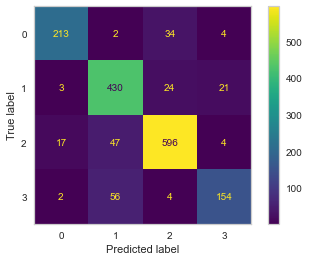

In [390]:
print('Accuracy: ', accuracy_score(y_test_vif, vif_y_pred))
print(classification_report(y_test_vif, vif_y_pred))
cm = confusion_matrix(y_test_vif, vif_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = vif_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

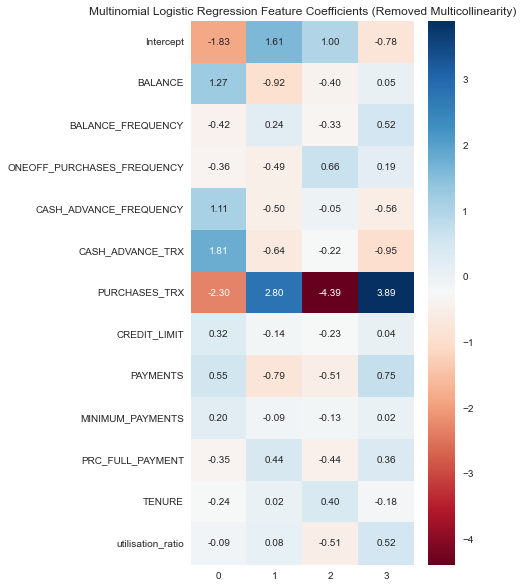

In [391]:
vif_coef = pd.DataFrame(vif_model.named_steps['logisticregression'].coef_, columns = X_vif.columns).T
# lr_coef = pd.DataFrame(lr_model.named_steps['logisticregression'].coef_, 
#                       columns = lr_model.named_steps['factoranalysis'].get_feature_names_out()).T
vif_bias = pd.DataFrame(vif_model.named_steps['logisticregression'].intercept_, columns = ['Intercept']).T
vif_weights = pd.concat([vif_bias, vif_coef], axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(5, 10))
sns.heatmap(vif_weights, annot = True, cmap='RdBu', ax = ax, fmt ='.2f')
plt.title('Multinomial Logistic Regression Feature Coefficients (Removed Multicollinearity)')
plt.show()

## 8. Decision Tree Classifier

In [392]:
dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state = 0))
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

Accuracy:  0.9155803848541278
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       253
           1       0.92      0.92      0.92       478
           2       0.92      0.93      0.93       664
           3       0.93      0.91      0.92       216

    accuracy                           0.92      1611
   macro avg       0.91      0.91      0.91      1611
weighted avg       0.92      0.92      0.92      1611



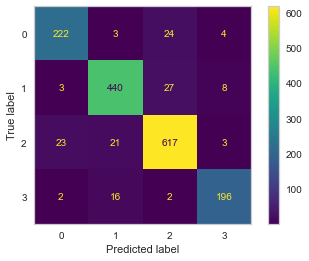

In [393]:
print('Accuracy: ', accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))
cm = confusion_matrix(y_test, dt_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

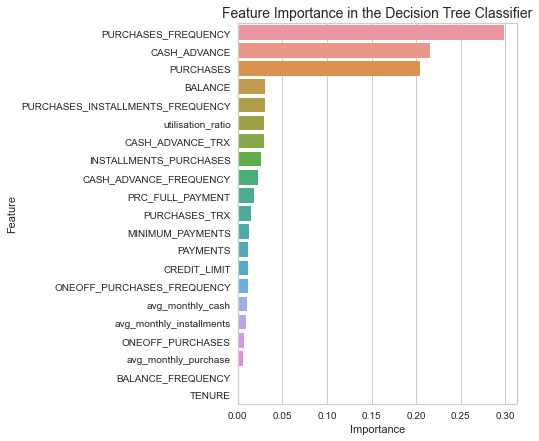

In [394]:
dt_importance = pd.DataFrame({'Feature': features, 'Importance': dt_model.named_steps['decisiontreeclassifier'].feature_importances_})

dt_importance.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(5, 7))
sns.barplot(y = 'Feature', x = 'Importance',orient = 'h', data=dt_importance)
plt.title('Feature Importance in the Decision Tree Classifier', fontsize=14)
plt.show()

## #. Linear Discriminant Analysis (Used for Testing/Trying out)

In [395]:
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

lda_model = make_pipeline(StandardScaler(), #transformer, 
                          LinearDiscriminantAnalysis(n_components = 2))
lda_model.fit(X_train1, y_train1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2))])

In [396]:
X_test1 = np.array(X_test)
y_test1 = np.array(y_test)

lda_y_pred = lda_model.predict(X_test1)

Accuracy:  0.9273743016759777
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       253
           1       0.91      0.92      0.92       478
           2       0.91      0.97      0.94       664
           3       0.98      0.89      0.93       216

    accuracy                           0.93      1611
   macro avg       0.95      0.91      0.92      1611
weighted avg       0.93      0.93      0.93      1611



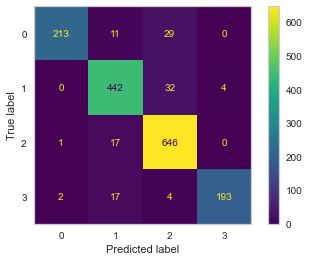

In [397]:
print("Accuracy: ", accuracy_score(y_test1, lda_y_pred))
print(classification_report(y_test1, lda_y_pred))
cm = confusion_matrix(y_test1, lda_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lda_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

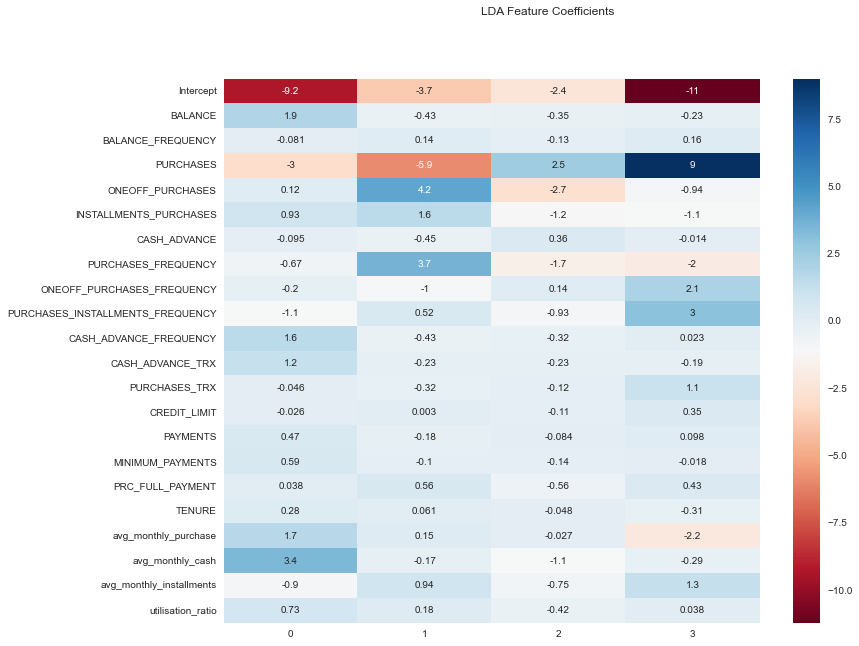

In [398]:
lda_coef = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].coef_, columns = X.columns).T
# lda_coef = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].coef_, 
#                        columns = lda_model.named_steps['factoranalysis'].get_feature_names_out()).T
lda_bias = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].intercept_, columns = ['Intercept']).T
lda_weights = pd.concat([lda_bias, lda_coef], axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(lda_weights.round(3), annot = True, cmap='RdBu', ax = ax)
plt.suptitle('LDA Feature Coefficients')
plt.show()

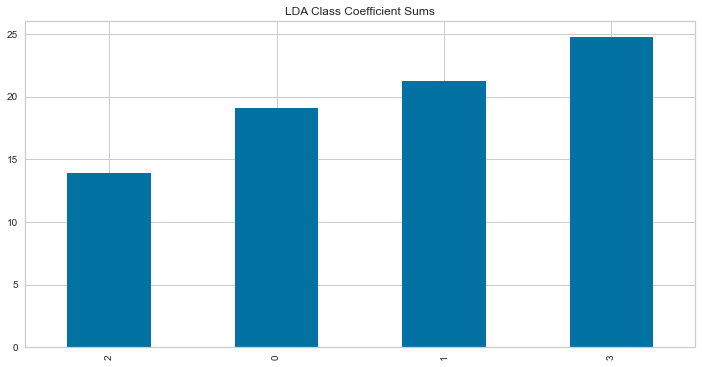

In [399]:
pd.Series(np.abs(lda_model.named_steps['lineardiscriminantanalysis'].coef_).sum(axis=1), 
          index=lda_model.named_steps['lineardiscriminantanalysis'].classes_).sort_values().plot.bar(
    figsize=(12, 6), title="LDA Class Coefficient Sums"
)
plt.show()
#Cluster 2, 0 is much more separable than 1

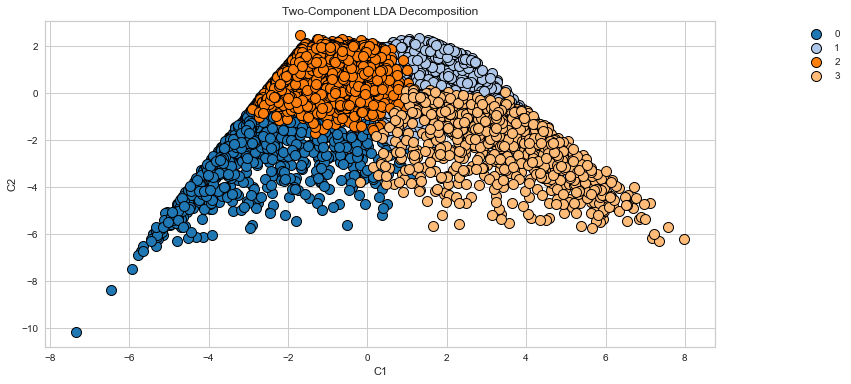

In [400]:
X_hat = lda_model.fit_transform(X, y)

import matplotlib as mpl

colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories

ret = pd.DataFrame(
    {'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))}
)

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret.query('Type == @cat').plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='black', linewidth=1,
                       title='Two-Component LDA Decomposition').legend(bbox_to_anchor=(1.2, 1))
    )
#Classifying the different clusters of credit customers are linearly distinguishable by the numerical values alone.

## 9. OLS Linear Regression Model

In [401]:
clean_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'labels'],
      dtype='object')

In [402]:
#The goal is to identify a feature that is distinct from the rest so we can possibly exploit it for the business to work on.

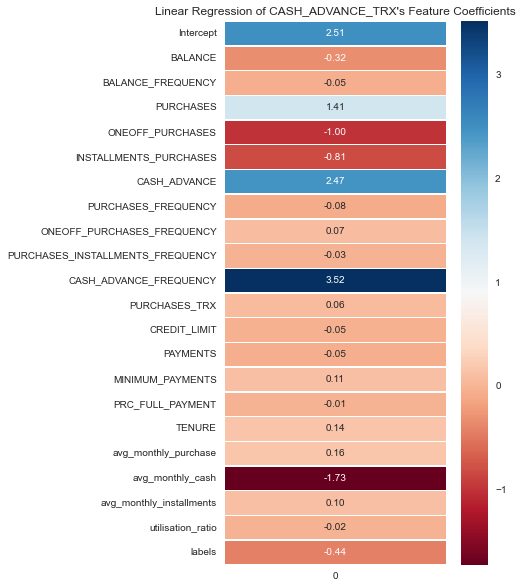

In [403]:
#Edit here to test out different target variables and the scaling involved.
target = 'CASH_ADVANCE_TRX'
scaling_technique = StandardScaler()
############################

clf_x = clean_df.drop(columns = [target], axis = 1)
clf_y = clean_df[target]

# clf_x = clean_df.copy()
# clf_x = clean_df[remove_high_vif]
# clf_y = clean_df[target]
                    
#Linear Regression Model    
clf_model = make_pipeline(scaling_technique, LinearRegression())
clf_model.fit(clf_x, clf_y)
clf_y_pred = clf_model.predict(clf_x)

#Weights output
clf_coef = pd.DataFrame([clf_model.named_steps['linearregression'].coef_], columns = clf_x.columns).T
clf_bias = pd.DataFrame([clf_model.named_steps['linearregression'].intercept_], columns = ['Intercept']).T
clf_weights = pd.concat([clf_bias, clf_coef], axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(5, 10))
sns.heatmap(clf_weights, annot = True, cmap='RdBu', ax = ax, linewidths = .5, fmt ='.2f')
plt.title(f'Linear Regression of {target}\'s Feature Coefficients')
plt.show()


In [404]:
sm_model = sm.OLS(clf_y, clf_x).fit()
print(sm_model.summary())

                                 OLS Regression Results                                
Dep. Variable:       CASH_ADVANCE_TRX   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              1386.
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:47:36   Log-Likelihood:                         -18841.
No. Observations:                8054   AIC:                                  3.772e+04
Df Residuals:                    8033   BIC:                                  3.787e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

The values we are concerned with are -

- The coefficients and significance (p-values)
- R-squared
- F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV. This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.